# Import Required Libraries
Import the necessary libraries for data analysis and visualization, including pandas, matplotlib, seaborn, and plotly.

# Load the Combined Report Data
Load the combined_report.json file into a pandas DataFrame and examine its structure, including document information and processing metrics.

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [3]:
# Load the Combined Report Data
with open('/home/azureuser/academic-document-analyzer/nb/Profile_pipeline/combined_report.json', 'r') as file:
    combined_report = json.load(file)

# Convert the combined report to a pandas DataFrame
documents_df = pd.DataFrame(combined_report['documents'])

# Display the structure of the DataFrame
documents_df.head()

# Display summary statistics of the DataFrame
documents_df.describe()

# Display the overall metrics from the combined report
overall_metrics = {key: combined_report[key] for key in combined_report if key != 'documents'}
overall_metrics

{'total_documents': 19,
 'total_pages': 587,
 'total_time_seconds': 1180.2164435386658,
 'total_nougat_images': 512,
 'total_images': 241,
 'total_tables': 98,
 'total_time_formatted': '19m 40.22s',
 'avg_pages_per_document': 30.894736842105264,
 'avg_processing_time_per_document': 62.11665492308767,
 'avg_nougat_images_per_document': 26.94736842105263,
 'avg_images_per_document': 12.68421052631579,
 'avg_tables_per_document': 5.157894736842105,
 'avg_processing_time_per_page': 2.0105901934219177,
 'report_generated': '2025-03-08 20:32:48'}

# Calculate Processing Statistics
Calculate additional statistics about pipeline performance such as processing time per element, time distribution across documents, and throughput metrics.

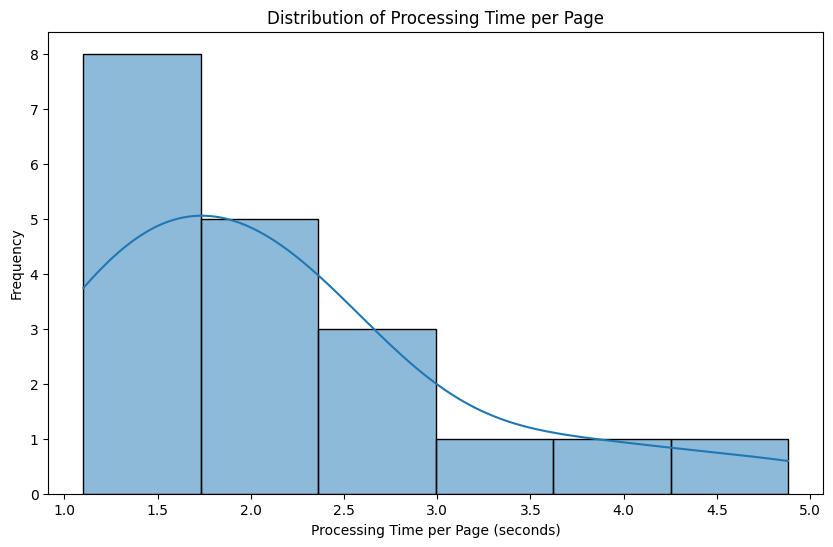

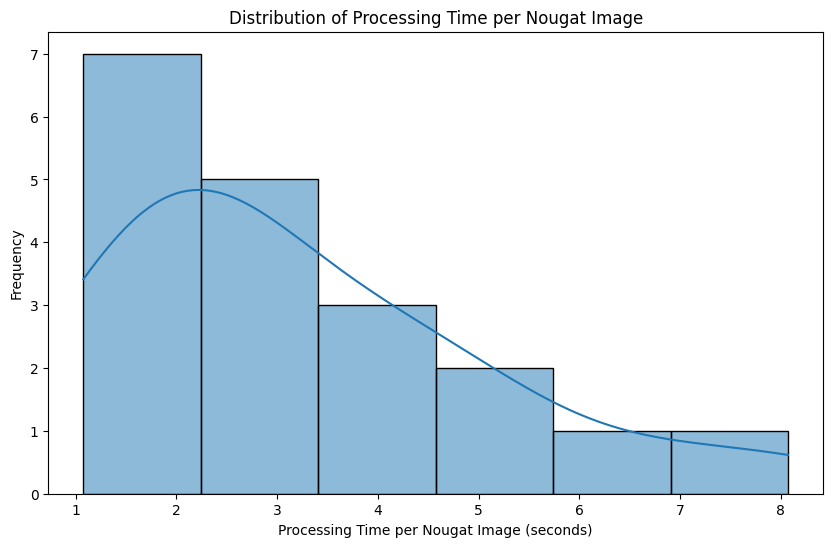

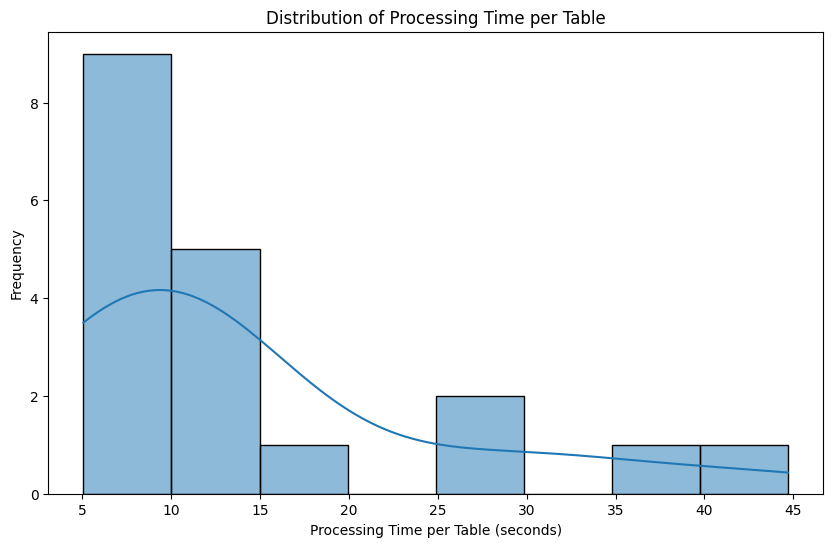

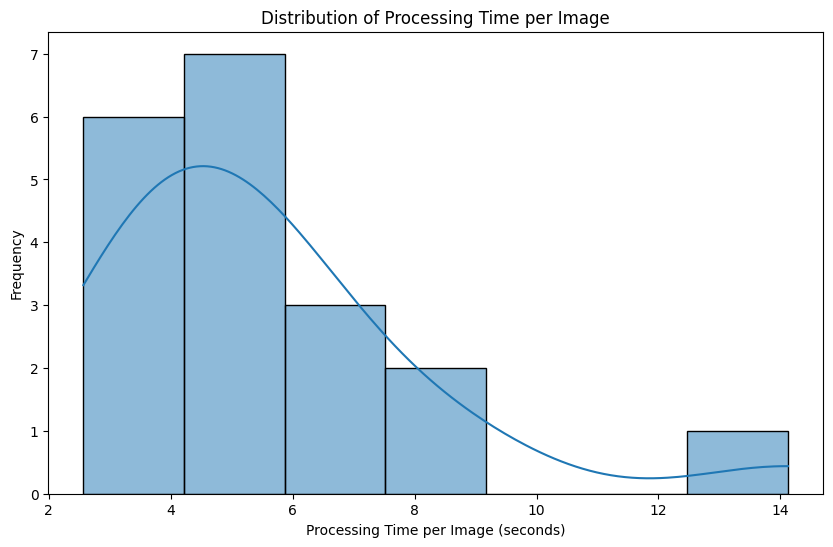

{'documents_per_second': 0.016098741975693824,
 'pages_per_second': 0.4973663968280145,
 'nougat_images_per_second': 0.4338187311344862,
 'images_per_second': 0.20419983242853745,
 'tables_per_second': 0.08303561650621026}

In [4]:
# Calculate Processing Statistics

# Calculate processing time per page
documents_df['processing_time_per_page'] = documents_df['processing_time_seconds'] / documents_df['pages']

# Calculate processing time per nougat image
documents_df['processing_time_per_nougat_image'] = documents_df['processing_time_seconds'] / documents_df['nougat_images']

# Calculate processing time per table
documents_df['processing_time_per_table'] = documents_df['processing_time_seconds'] / documents_df['tables']

# Calculate processing time per image
documents_df['processing_time_per_image'] = documents_df['processing_time_seconds'] / documents_df['images']

# Display the updated DataFrame with new statistics
documents_df.head()

# Plot the distribution of processing time per page
plt.figure(figsize=(10, 6))
sns.histplot(documents_df['processing_time_per_page'], kde=True)
plt.title('Distribution of Processing Time per Page')
plt.xlabel('Processing Time per Page (seconds)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of processing time per nougat image
plt.figure(figsize=(10, 6))
sns.histplot(documents_df['processing_time_per_nougat_image'], kde=True)
plt.title('Distribution of Processing Time per Nougat Image')
plt.xlabel('Processing Time per Nougat Image (seconds)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of processing time per table
plt.figure(figsize=(10, 6))
sns.histplot(documents_df['processing_time_per_table'], kde=True)
plt.title('Distribution of Processing Time per Table')
plt.xlabel('Processing Time per Table (seconds)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of processing time per image
plt.figure(figsize=(10, 6))
sns.histplot(documents_df['processing_time_per_image'], kde=True)
plt.title('Distribution of Processing Time per Image')
plt.xlabel('Processing Time per Image (seconds)')
plt.ylabel('Frequency')
plt.show()

# Calculate throughput metrics
total_documents = overall_metrics['total_documents']
total_pages = overall_metrics['total_pages']
total_time_seconds = overall_metrics['total_time_seconds']
total_nougat_images = overall_metrics['total_nougat_images']
total_images = overall_metrics['total_images']
total_tables = overall_metrics['total_tables']

throughput_metrics = {
    'documents_per_second': total_documents / total_time_seconds,
    'pages_per_second': total_pages / total_time_seconds,
    'nougat_images_per_second': total_nougat_images / total_time_seconds,
    'images_per_second': total_images / total_time_seconds,
    'tables_per_second': total_tables / total_time_seconds
}

# Display throughput metrics
throughput_metrics

# Visualize Processing Time
Create visualizations showing the distribution of processing time across documents and the relationship between document size (pages) and processing time.

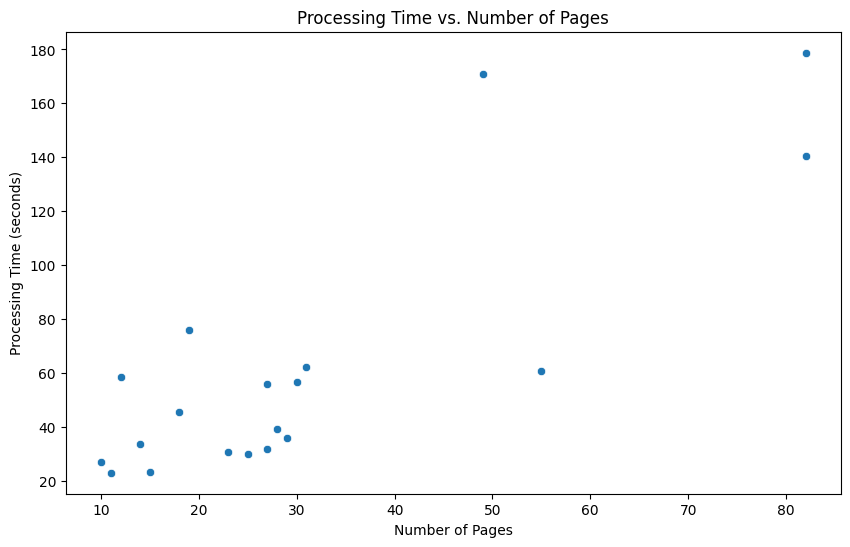

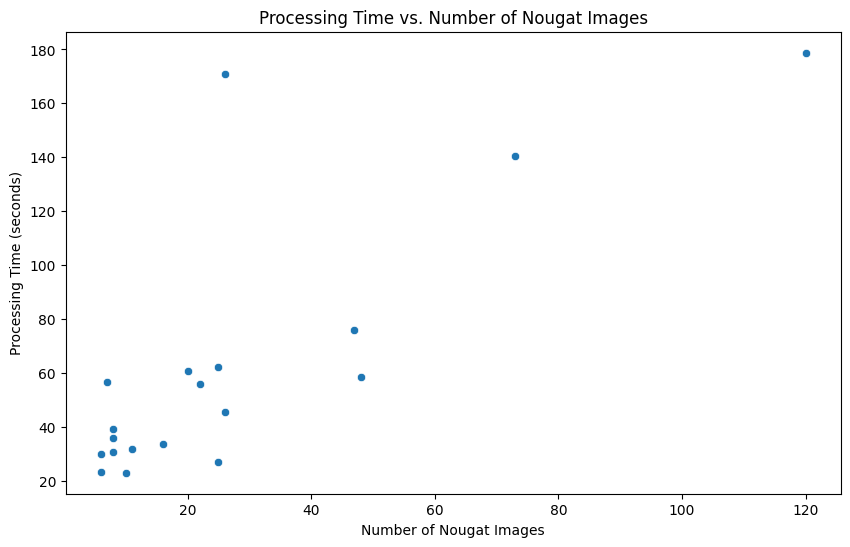

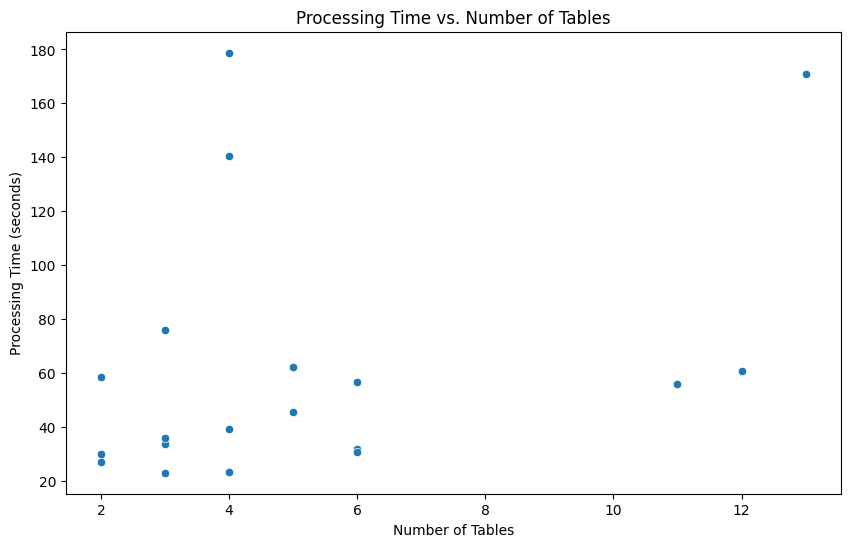

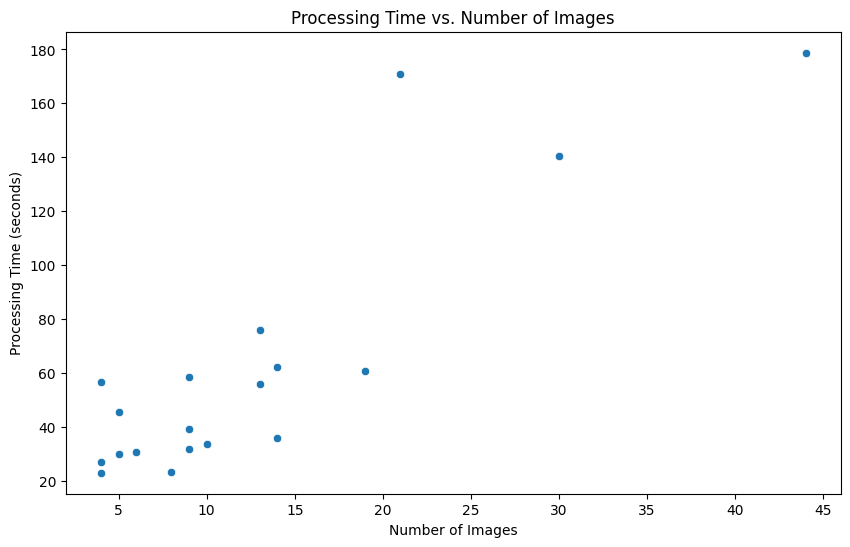

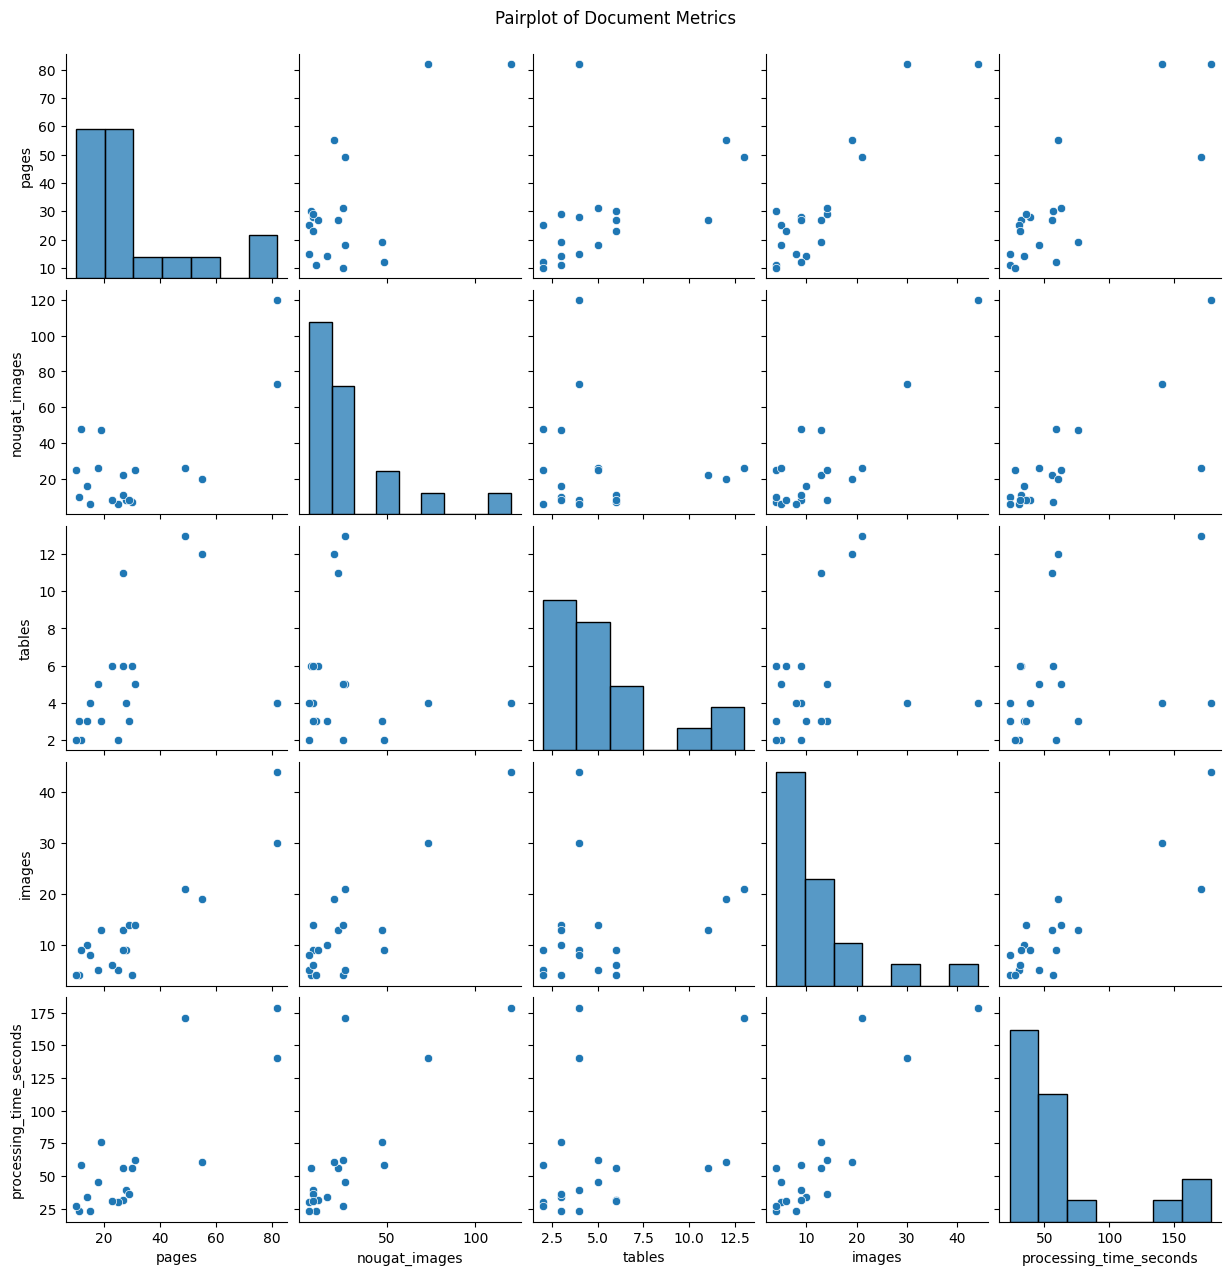

In [5]:
# Visualize Processing Time

# Scatter plot of processing time vs. number of pages
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pages', y='processing_time_seconds', data=documents_df)
plt.title('Processing Time vs. Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Processing Time (seconds)')
plt.show()

# Scatter plot of processing time vs. number of nougat images
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nougat_images', y='processing_time_seconds', data=documents_df)
plt.title('Processing Time vs. Number of Nougat Images')
plt.xlabel('Number of Nougat Images')
plt.ylabel('Processing Time (seconds)')
plt.show()

# Scatter plot of processing time vs. number of tables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tables', y='processing_time_seconds', data=documents_df)
plt.title('Processing Time vs. Number of Tables')
plt.xlabel('Number of Tables')
plt.ylabel('Processing Time (seconds)')
plt.show()

# Scatter plot of processing time vs. number of images
plt.figure(figsize=(10, 6))
sns.scatterplot(x='images', y='processing_time_seconds', data=documents_df)
plt.title('Processing Time vs. Number of Images')
plt.xlabel('Number of Images')
plt.ylabel('Processing Time (seconds)')
plt.show()

# Pairplot to visualize relationships between different metrics
sns.pairplot(documents_df, vars=['pages', 'nougat_images', 'tables', 'images', 'processing_time_seconds'])
plt.suptitle('Pairplot of Document Metrics', y=1.02)
plt.show()

# Analyze Element Extraction
Compare the distribution of extracted elements (images, tables, nougat_images) across documents and visualize the extraction density per page.

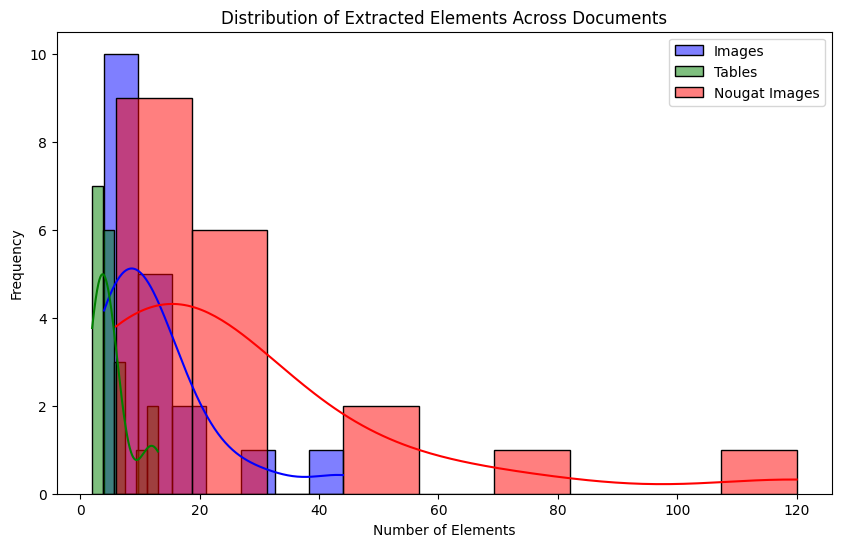

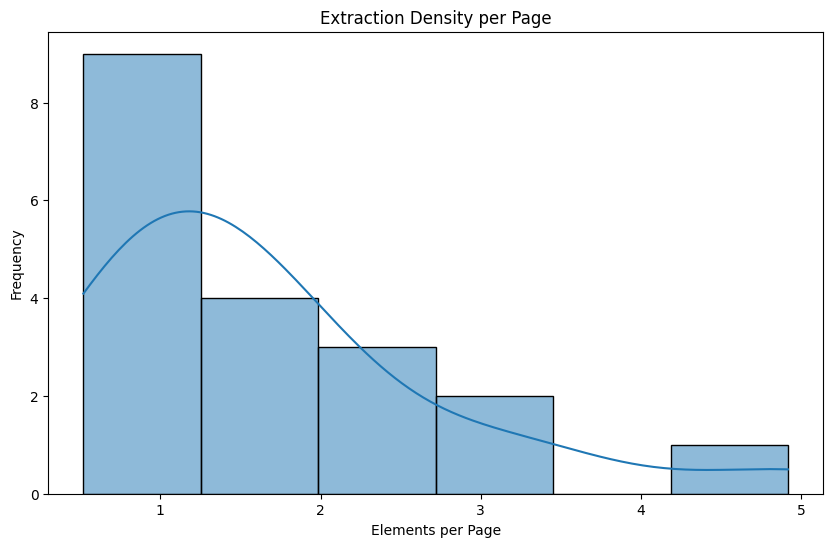

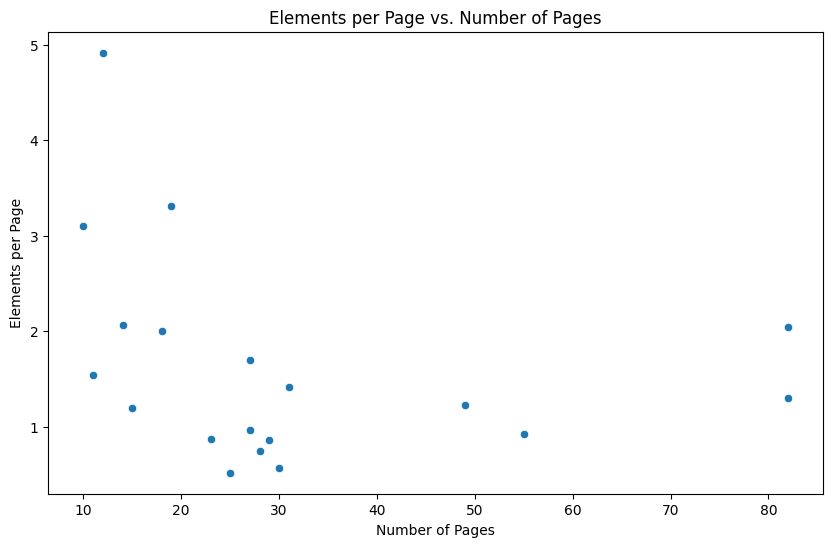

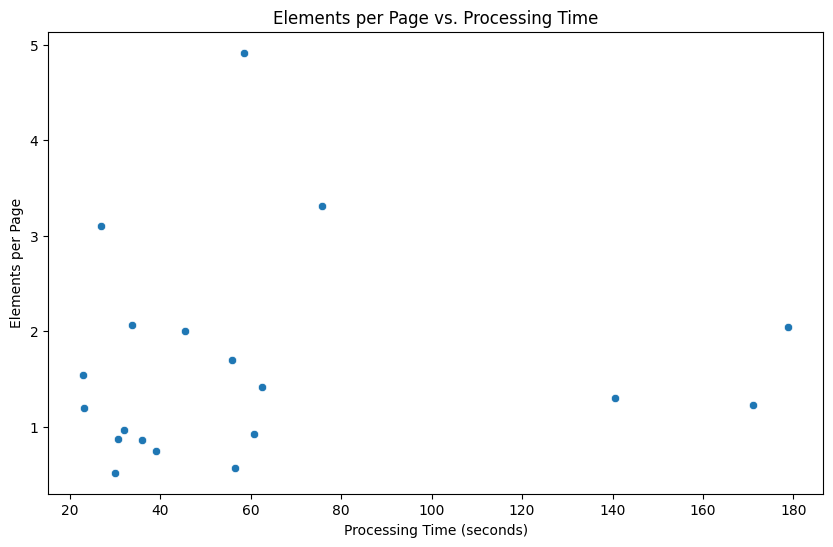

In [6]:
# Analyze Element Extraction

# Compare the distribution of extracted elements (images, tables, nougat_images) across documents
plt.figure(figsize=(10, 6))
sns.histplot(documents_df['images'], kde=True, color='blue', label='Images')
sns.histplot(documents_df['tables'], kde=True, color='green', label='Tables')
sns.histplot(documents_df['nougat_images'], kde=True, color='red', label='Nougat Images')
plt.title('Distribution of Extracted Elements Across Documents')
plt.xlabel('Number of Elements')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualize the extraction density per page
documents_df['elements_per_page'] = (documents_df['images'] + documents_df['tables'] + documents_df['nougat_images']) / documents_df['pages']

plt.figure(figsize=(10, 6))
sns.histplot(documents_df['elements_per_page'], kde=True)
plt.title('Extraction Density per Page')
plt.xlabel('Elements per Page')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of elements per page vs. number of pages
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pages', y='elements_per_page', data=documents_df)
plt.title('Elements per Page vs. Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Elements per Page')
plt.show()

# Scatter plot of elements per page vs. processing time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='processing_time_seconds', y='elements_per_page', data=documents_df)
plt.title('Elements per Page vs. Processing Time')
plt.xlabel('Processing Time (seconds)')
plt.ylabel('Elements per Page')
plt.show()

# Compare Document Processing
Create comparative visualizations between documents showing processing efficiency and element extraction performance.

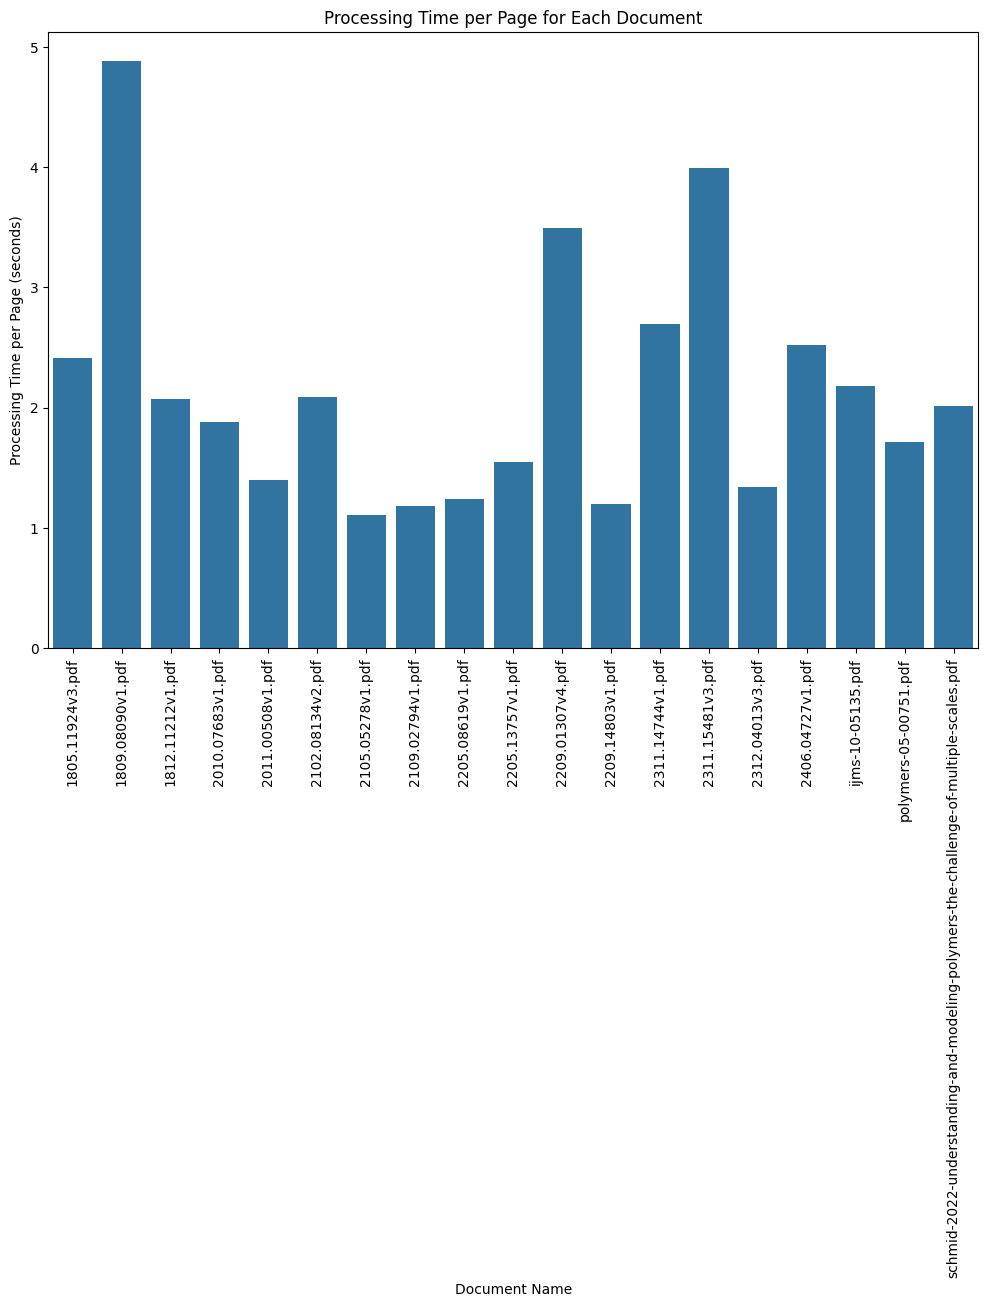

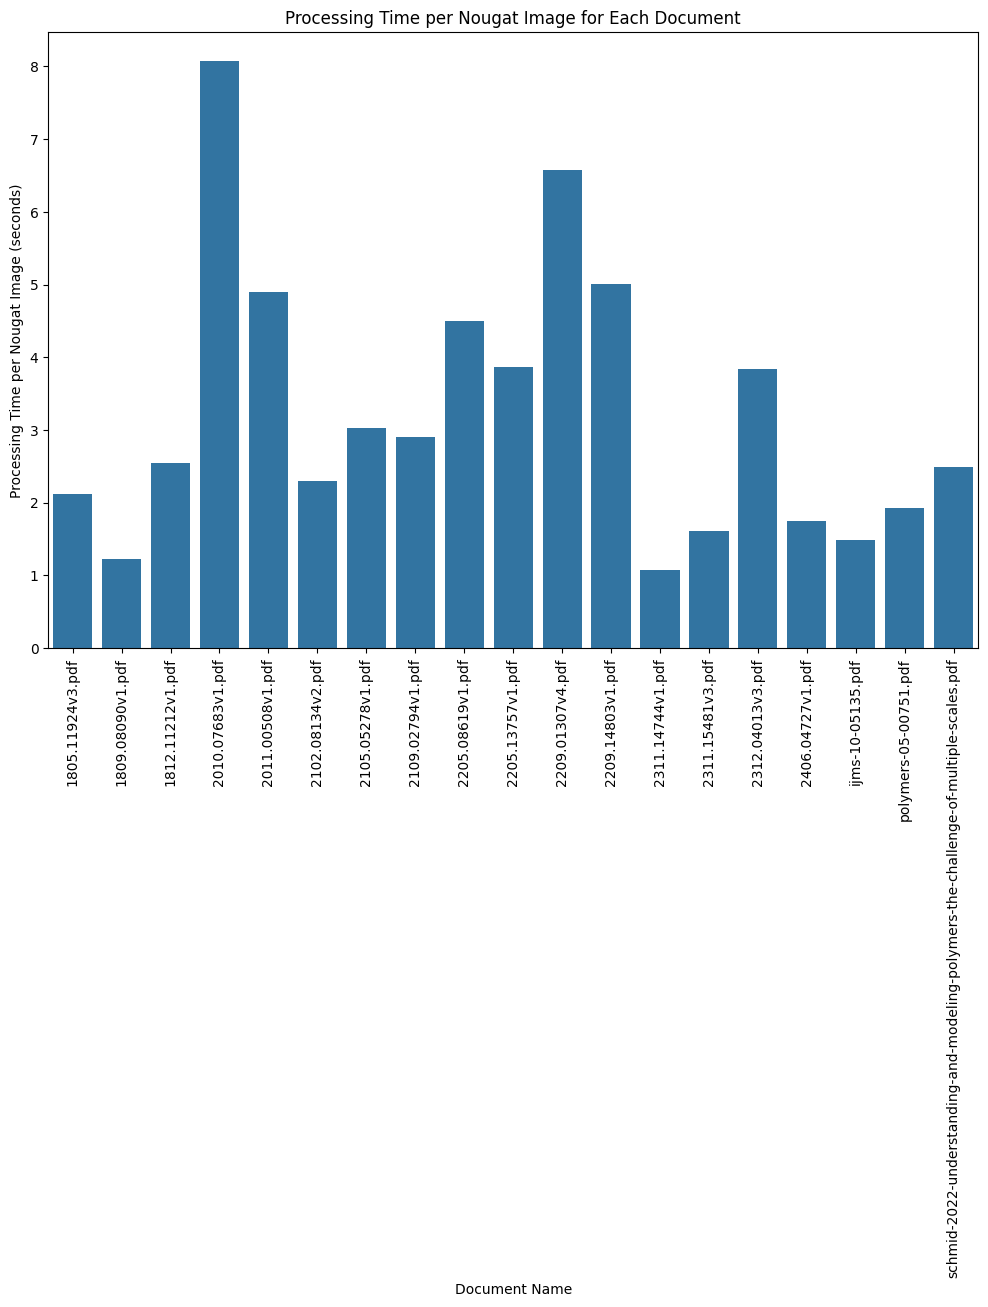

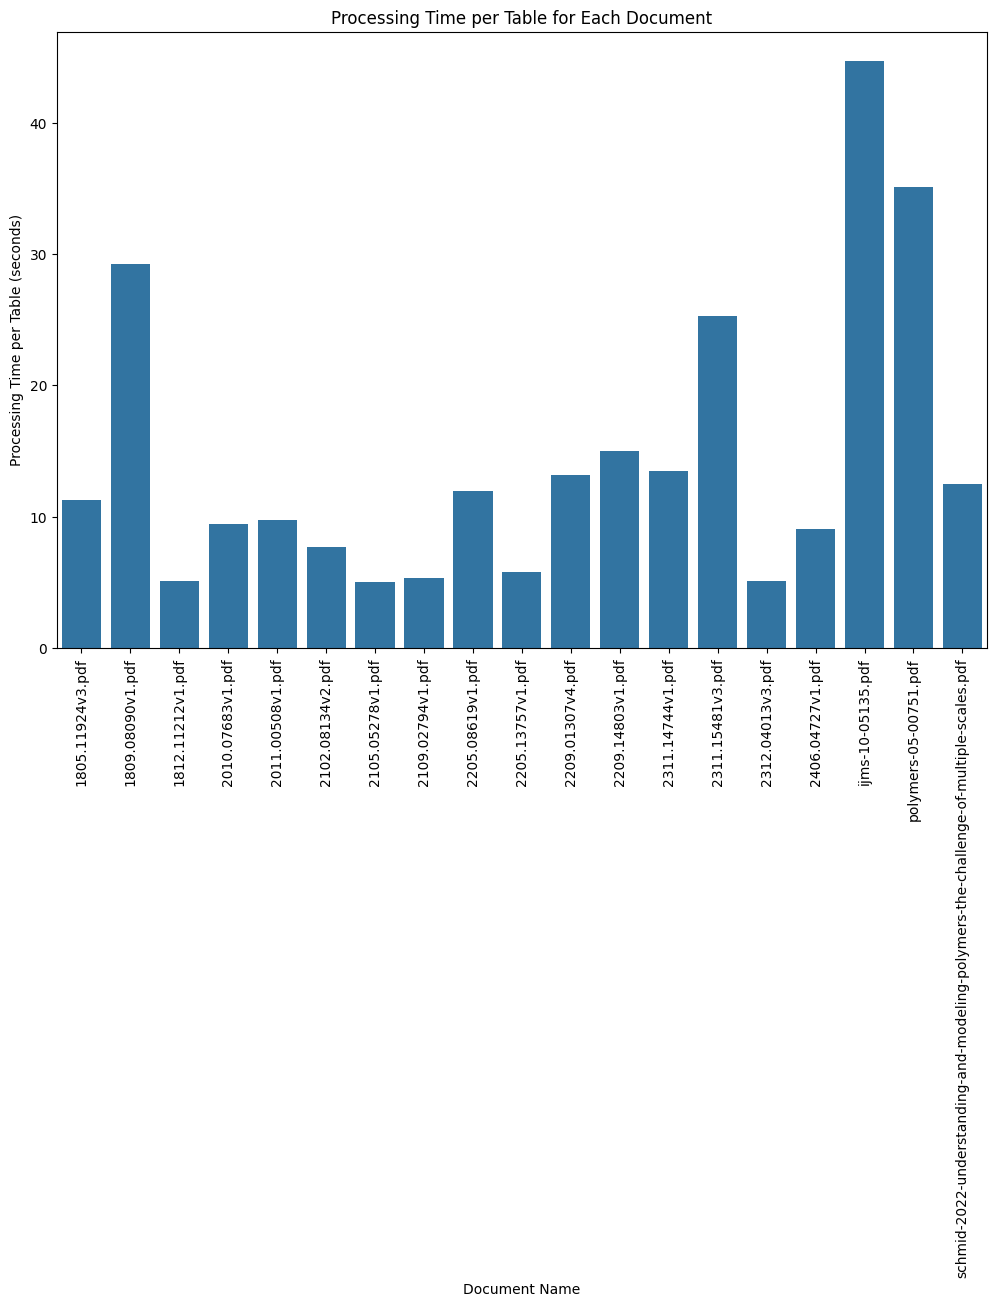

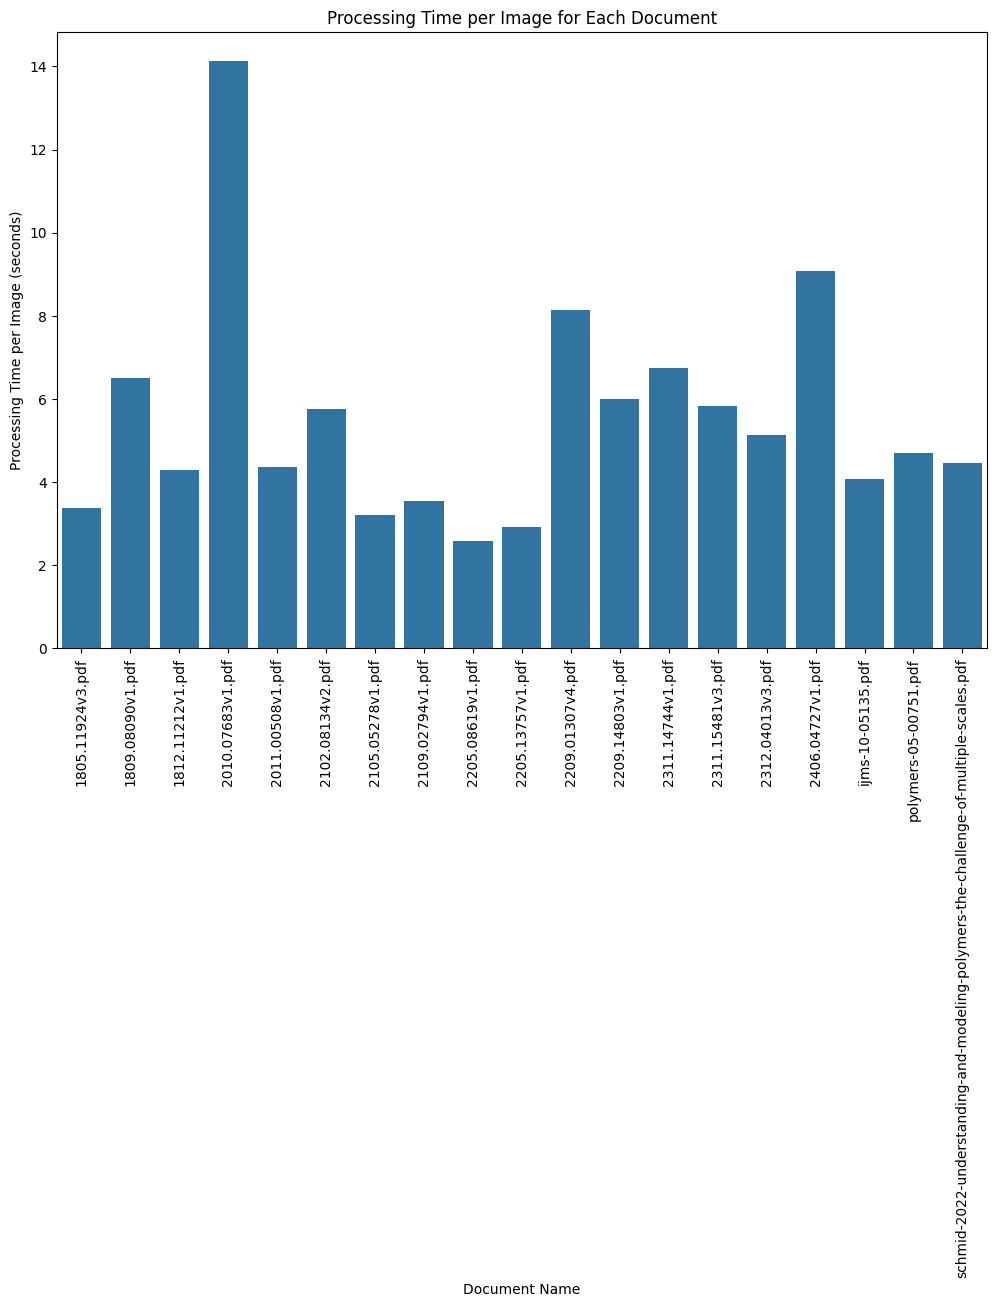

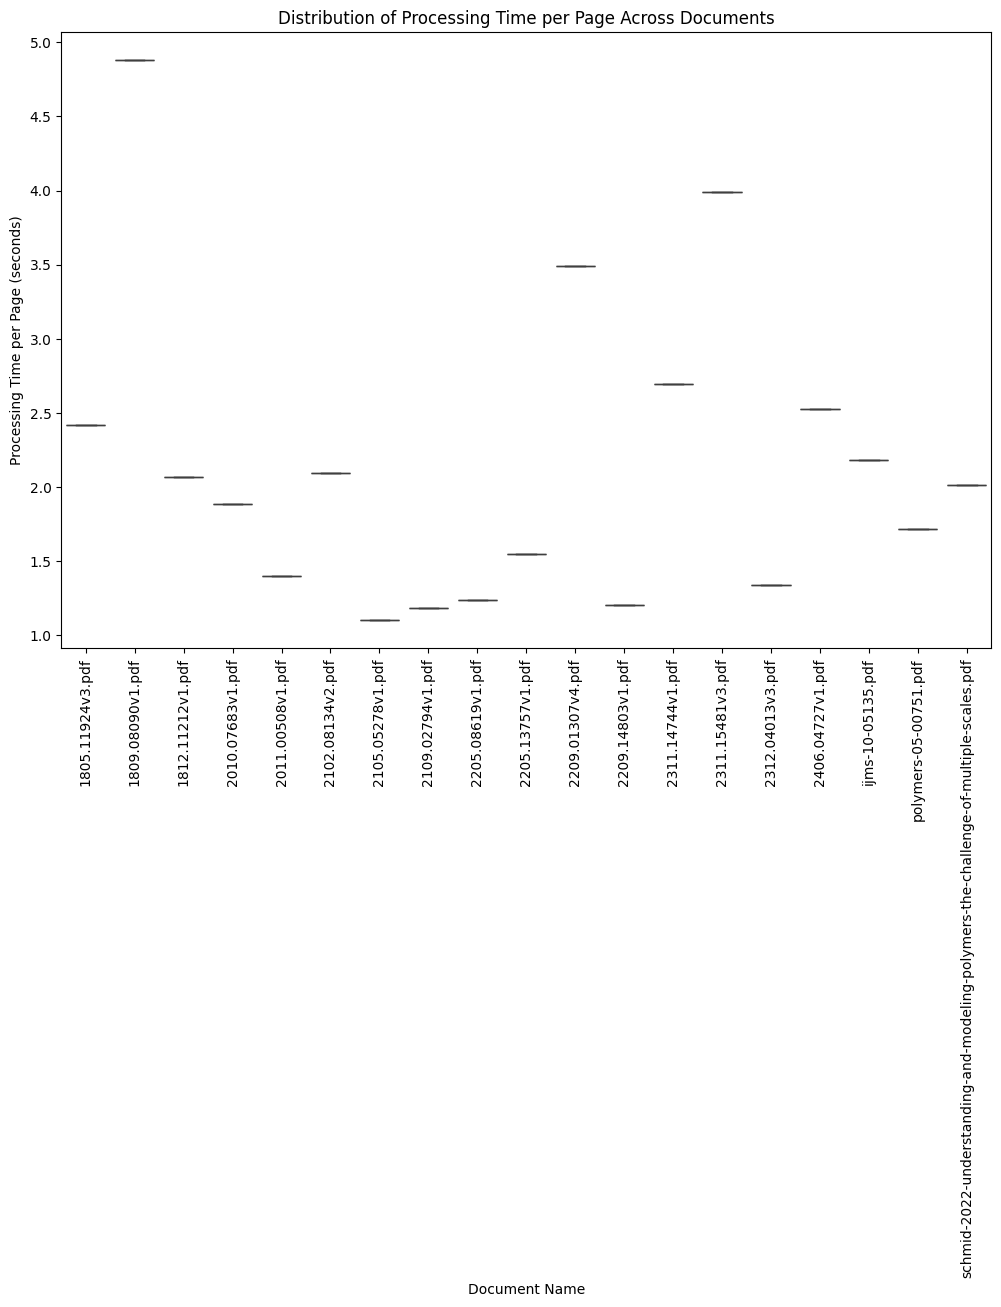

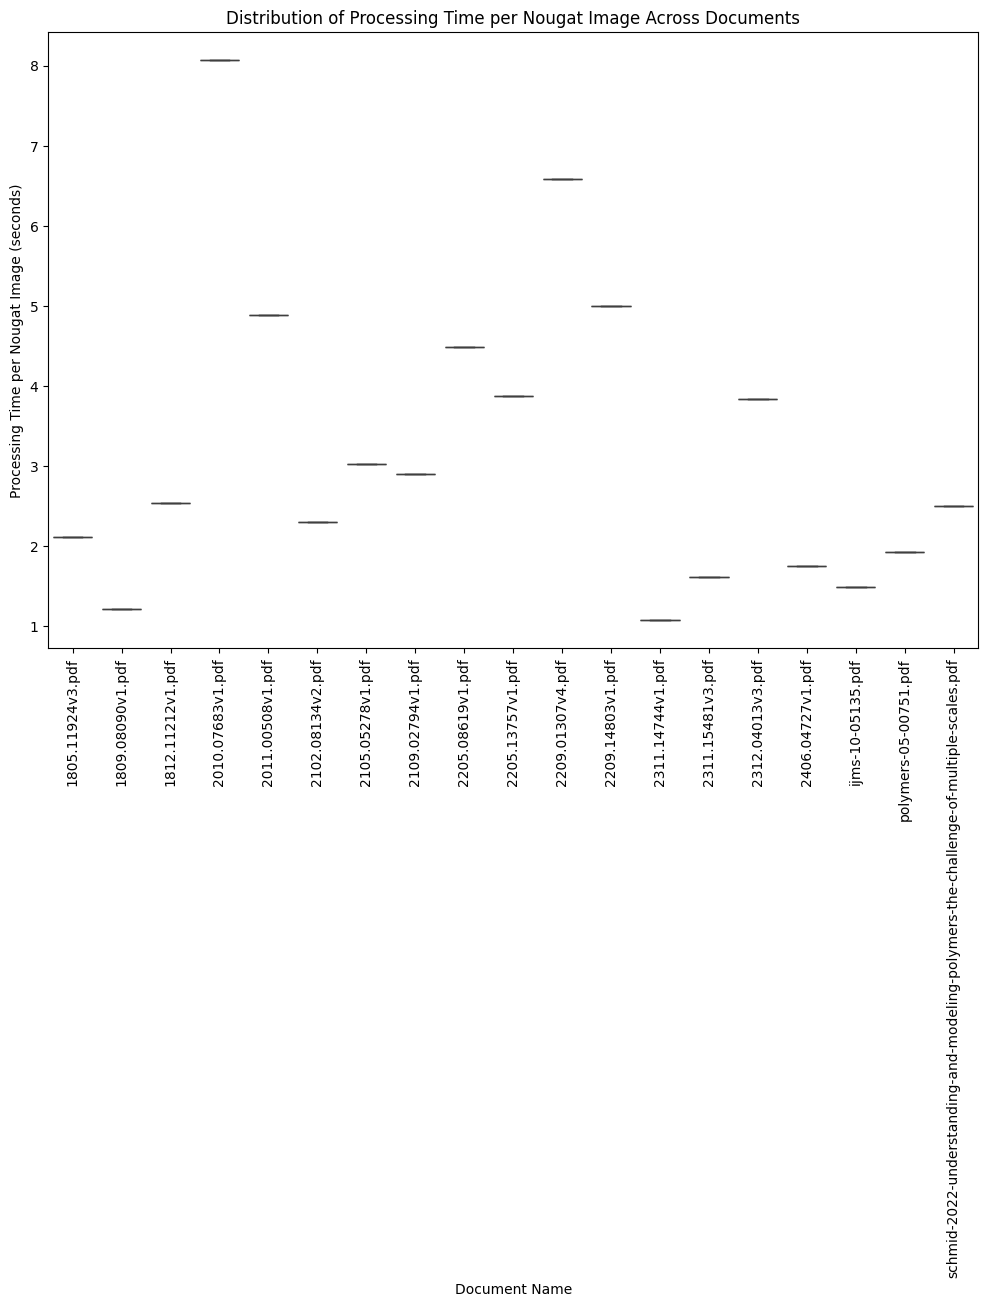

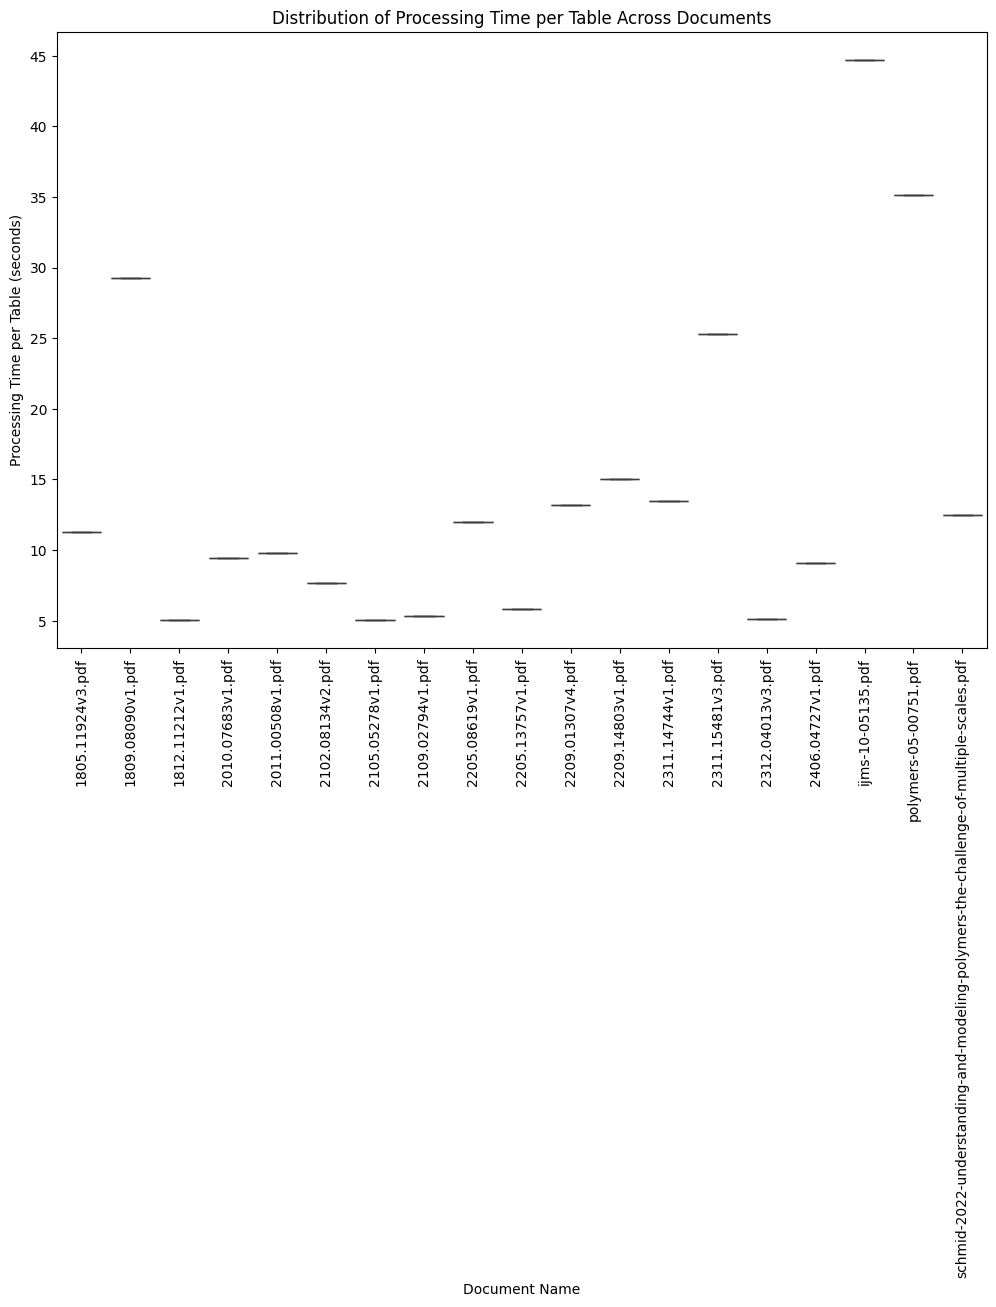

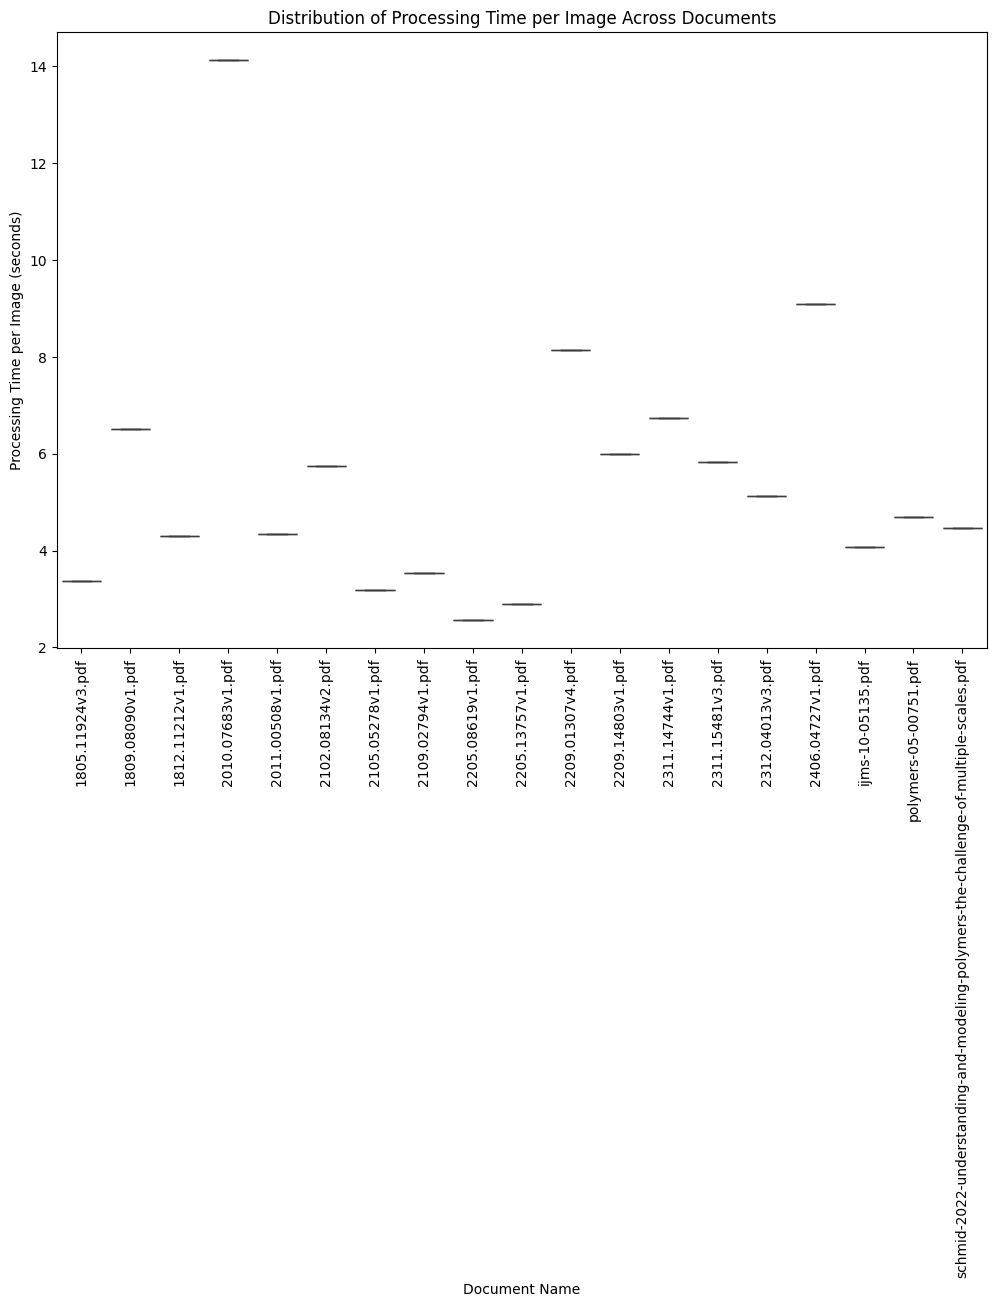

In [7]:
# Compare Document Processing

# Create comparative visualizations between documents showing processing efficiency and element extraction performance

# Bar plot comparing processing time per page for each document
plt.figure(figsize=(12, 8))
sns.barplot(x='document_name', y='processing_time_per_page', data=documents_df)
plt.title('Processing Time per Page for Each Document')
plt.xlabel('Document Name')
plt.ylabel('Processing Time per Page (seconds)')
plt.xticks(rotation=90)
plt.show()

# Bar plot comparing processing time per nougat image for each document
plt.figure(figsize=(12, 8))
sns.barplot(x='document_name', y='processing_time_per_nougat_image', data=documents_df)
plt.title('Processing Time per Nougat Image for Each Document')
plt.xlabel('Document Name')
plt.ylabel('Processing Time per Nougat Image (seconds)')
plt.xticks(rotation=90)
plt.show()

# Bar plot comparing processing time per table for each document
plt.figure(figsize=(12, 8))
sns.barplot(x='document_name', y='processing_time_per_table', data=documents_df)
plt.title('Processing Time per Table for Each Document')
plt.xlabel('Document Name')
plt.ylabel('Processing Time per Table (seconds)')
plt.xticks(rotation=90)
plt.show()

# Bar plot comparing processing time per image for each document
plt.figure(figsize=(12, 8))
sns.barplot(x='document_name', y='processing_time_per_image', data=documents_df)
plt.title('Processing Time per Image for Each Document')
plt.xlabel('Document Name')
plt.ylabel('Processing Time per Image (seconds)')
plt.xticks(rotation=90)
plt.show()

# Box plot to compare the distribution of processing times per page across documents
plt.figure(figsize=(12, 8))
sns.boxplot(x='document_name', y='processing_time_per_page', data=documents_df)
plt.title('Distribution of Processing Time per Page Across Documents')
plt.xlabel('Document Name')
plt.ylabel('Processing Time per Page (seconds)')
plt.xticks(rotation=90)
plt.show()

# Box plot to compare the distribution of processing times per nougat image across documents
plt.figure(figsize=(12, 8))
sns.boxplot(x='document_name', y='processing_time_per_nougat_image', data=documents_df)
plt.title('Distribution of Processing Time per Nougat Image Across Documents')
plt.xlabel('Document Name')
plt.ylabel('Processing Time per Nougat Image (seconds)')
plt.xticks(rotation=90)
plt.show()

# Box plot to compare the distribution of processing times per table across documents
plt.figure(figsize=(12, 8))
sns.boxplot(x='document_name', y='processing_time_per_table', data=documents_df)
plt.title('Distribution of Processing Time per Table Across Documents')
plt.xlabel('Document Name')
plt.ylabel('Processing Time per Table (seconds)')
plt.xticks(rotation=90)
plt.show()

# Box plot to compare the distribution of processing times per image across documents
plt.figure(figsize=(12, 8))
sns.boxplot(x='document_name', y='processing_time_per_image', data=documents_df)
plt.title('Distribution of Processing Time per Image Across Documents')
plt.xlabel('Document Name')
plt.ylabel('Processing Time per Image (seconds)')
plt.xticks(rotation=90)
plt.show()

# Evaluate Pipeline Efficiency
Calculate and visualize efficiency metrics like pages processed per minute, elements extracted per second, and identify potential bottlenecks in the processing pipeline.

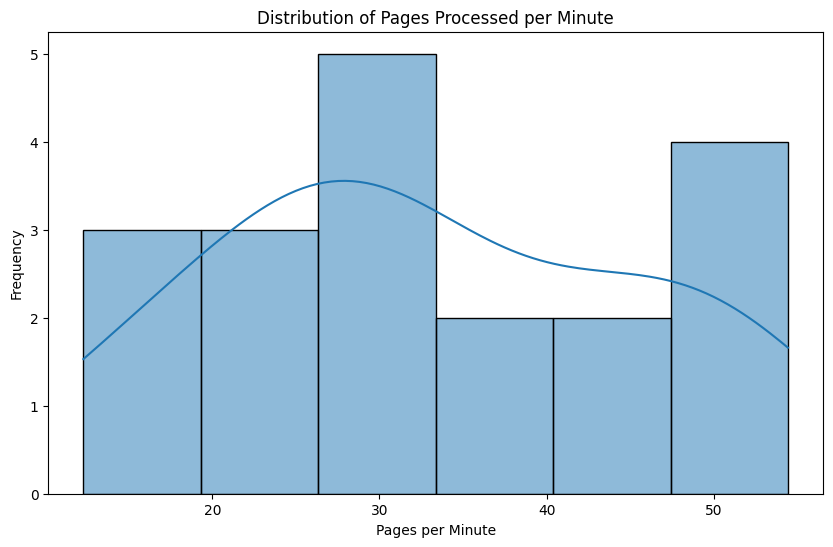

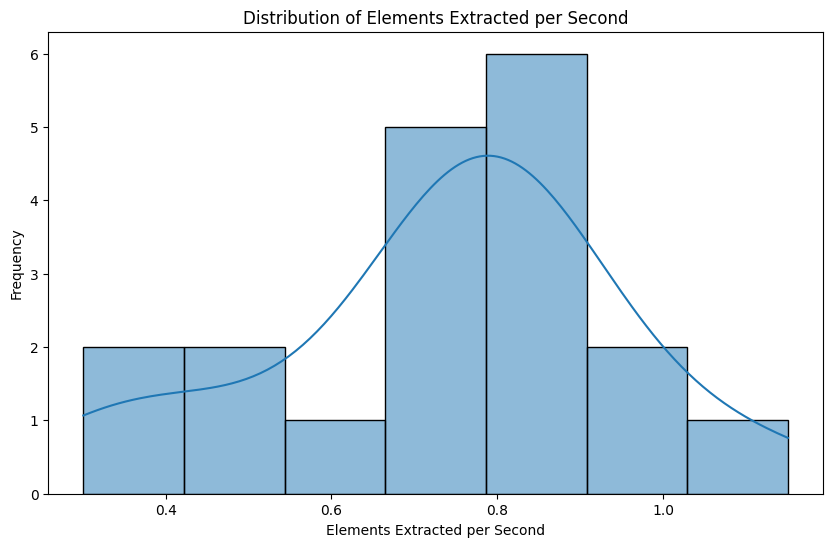

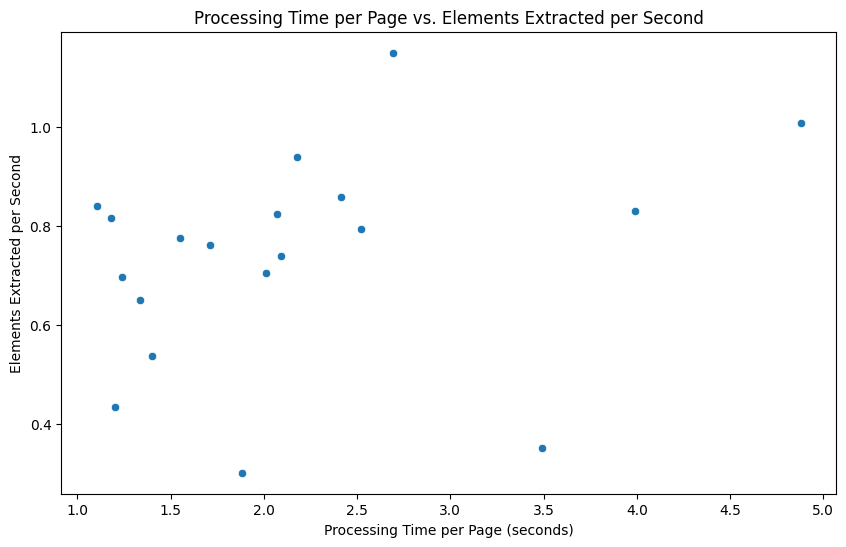

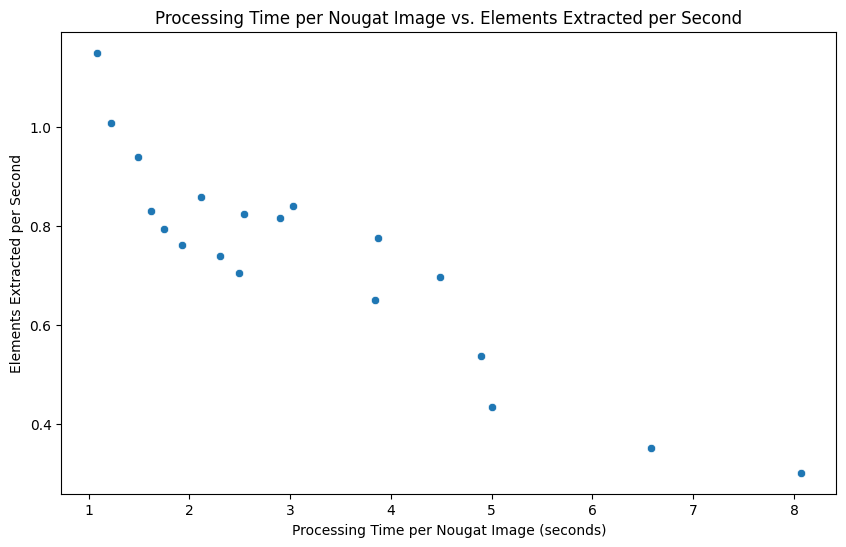

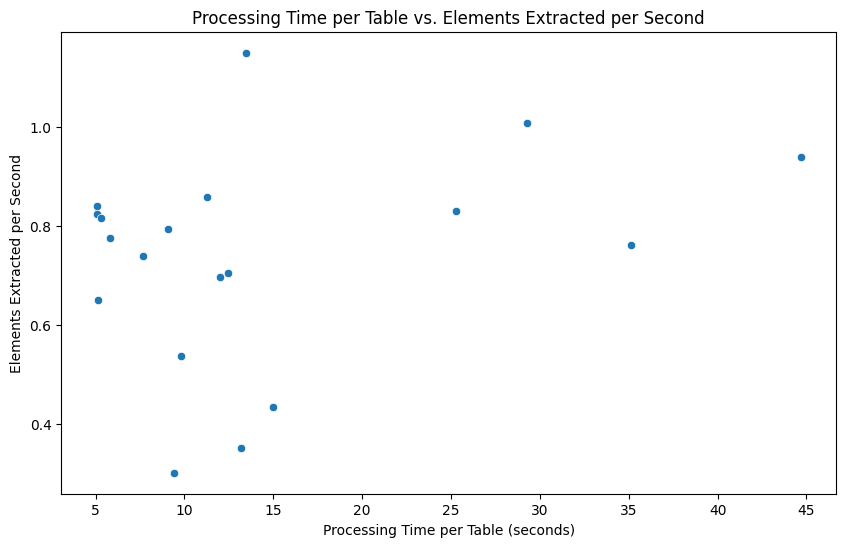

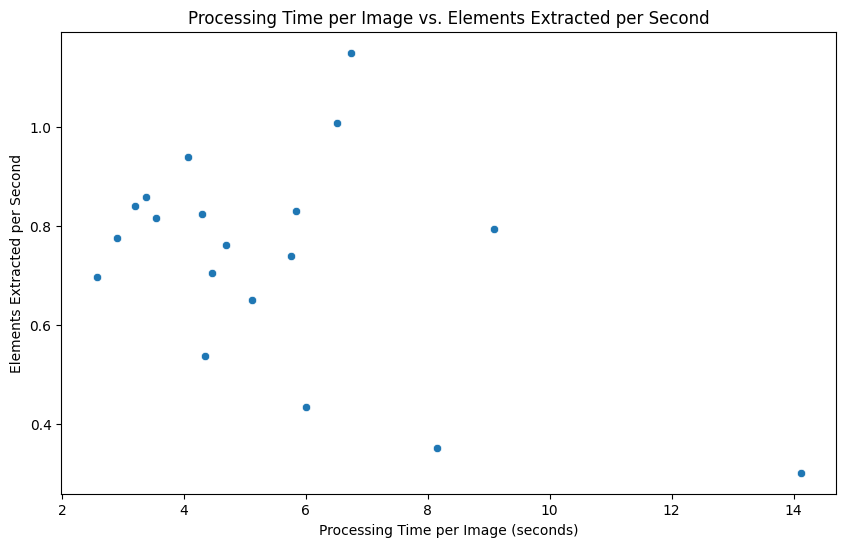

In [8]:
# Evaluate Pipeline Efficiency

# Calculate and visualize efficiency metrics like pages processed per minute, elements extracted per second, and identify potential bottlenecks in the processing pipeline.

# Calculate pages processed per minute
documents_df['pages_per_minute'] = documents_df['pages'] / (documents_df['processing_time_seconds'] / 60)

# Calculate elements extracted per second
documents_df['elements_extracted_per_second'] = (documents_df['images'] + documents_df['tables'] + documents_df['nougat_images']) / documents_df['processing_time_seconds']

# Display the updated DataFrame with new efficiency metrics
documents_df.head()

# Plot the distribution of pages processed per minute
plt.figure(figsize=(10, 6))
sns.histplot(documents_df['pages_per_minute'], kde=True)
plt.title('Distribution of Pages Processed per Minute')
plt.xlabel('Pages per Minute')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of elements extracted per second
plt.figure(figsize=(10, 6))
sns.histplot(documents_df['elements_extracted_per_second'], kde=True)
plt.title('Distribution of Elements Extracted per Second')
plt.xlabel('Elements Extracted per Second')
plt.ylabel('Frequency')
plt.show()

# Identify potential bottlenecks by comparing processing time per page with elements extracted per second
plt.figure(figsize=(10, 6))
sns.scatterplot(x='processing_time_per_page', y='elements_extracted_per_second', data=documents_df)
plt.title('Processing Time per Page vs. Elements Extracted per Second')
plt.xlabel('Processing Time per Page (seconds)')
plt.ylabel('Elements Extracted per Second')
plt.show()

# Identify potential bottlenecks by comparing processing time per nougat image with elements extracted per second
plt.figure(figsize=(10, 6))
sns.scatterplot(x='processing_time_per_nougat_image', y='elements_extracted_per_second', data=documents_df)
plt.title('Processing Time per Nougat Image vs. Elements Extracted per Second')
plt.xlabel('Processing Time per Nougat Image (seconds)')
plt.ylabel('Elements Extracted per Second')
plt.show()

# Identify potential bottlenecks by comparing processing time per table with elements extracted per second
plt.figure(figsize=(10, 6))
sns.scatterplot(x='processing_time_per_table', y='elements_extracted_per_second', data=documents_df)
plt.title('Processing Time per Table vs. Elements Extracted per Second')
plt.xlabel('Processing Time per Table (seconds)')
plt.ylabel('Elements Extracted per Second')
plt.show()

# Identify potential bottlenecks by comparing processing time per image with elements extracted per second
plt.figure(figsize=(10, 6))
sns.scatterplot(x='processing_time_per_image', y='elements_extracted_per_second', data=documents_df)
plt.title('Processing Time per Image vs. Elements Extracted per Second')
plt.xlabel('Processing Time per Image (seconds)')
plt.ylabel('Elements Extracted per Second')
plt.show()

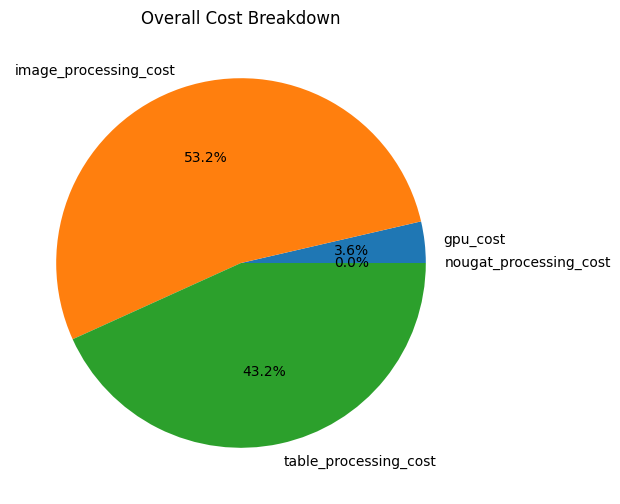

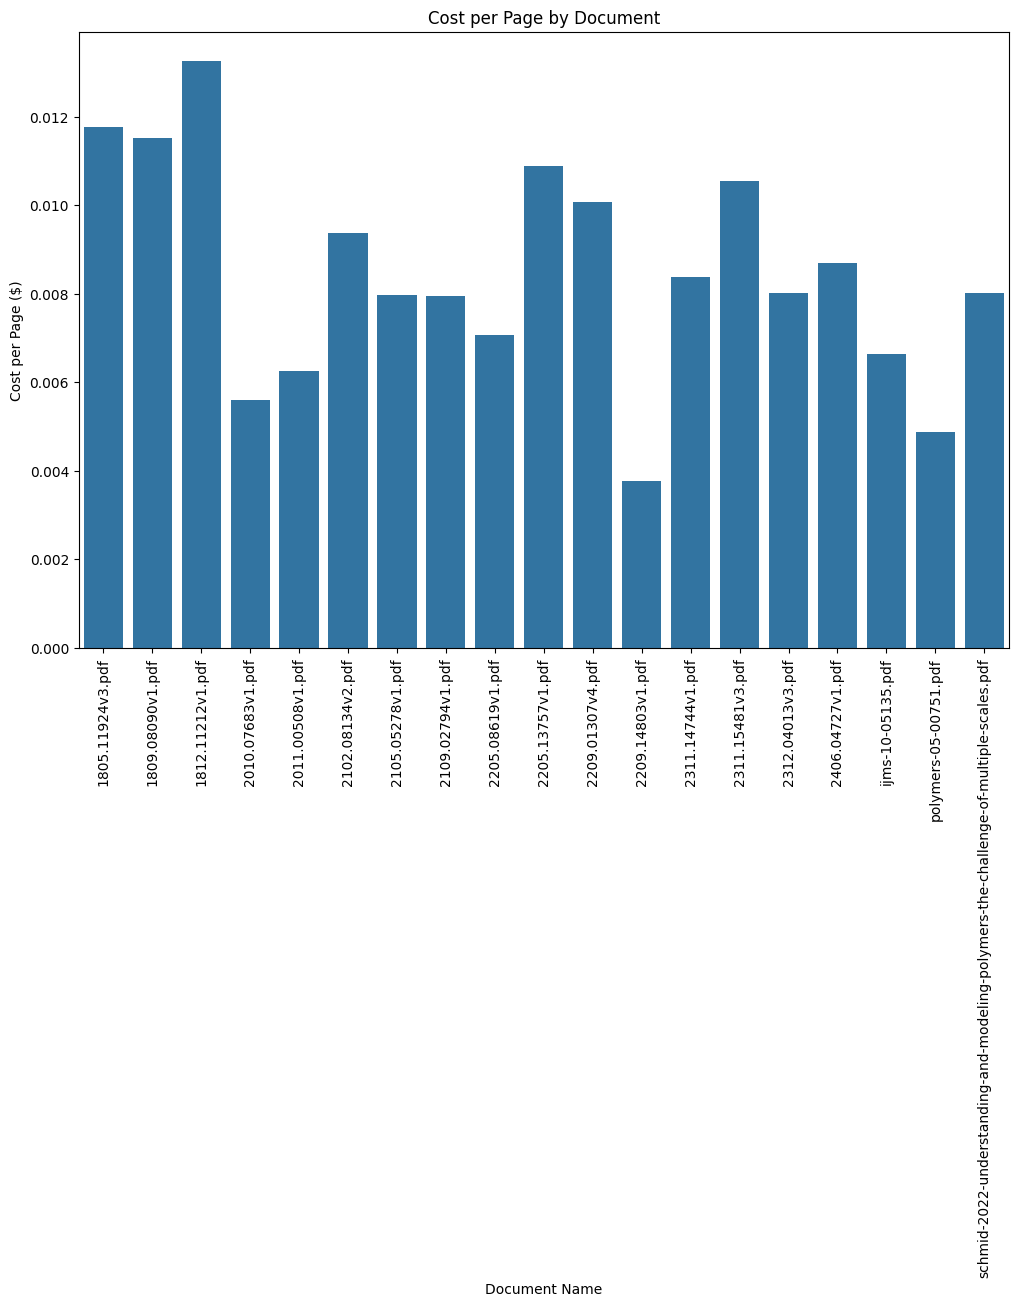

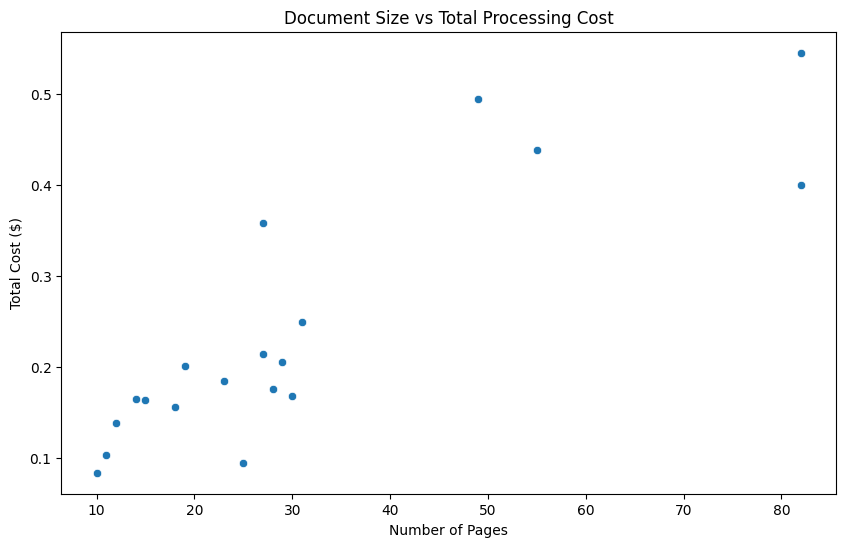

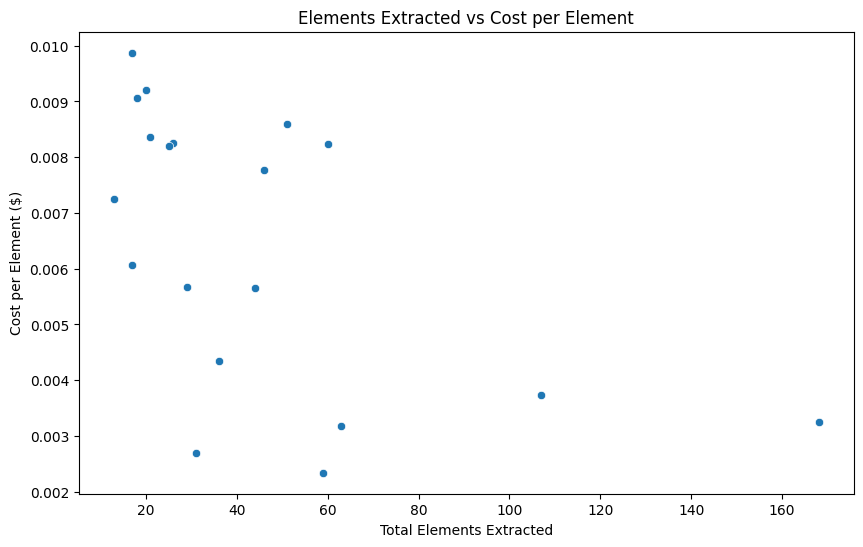

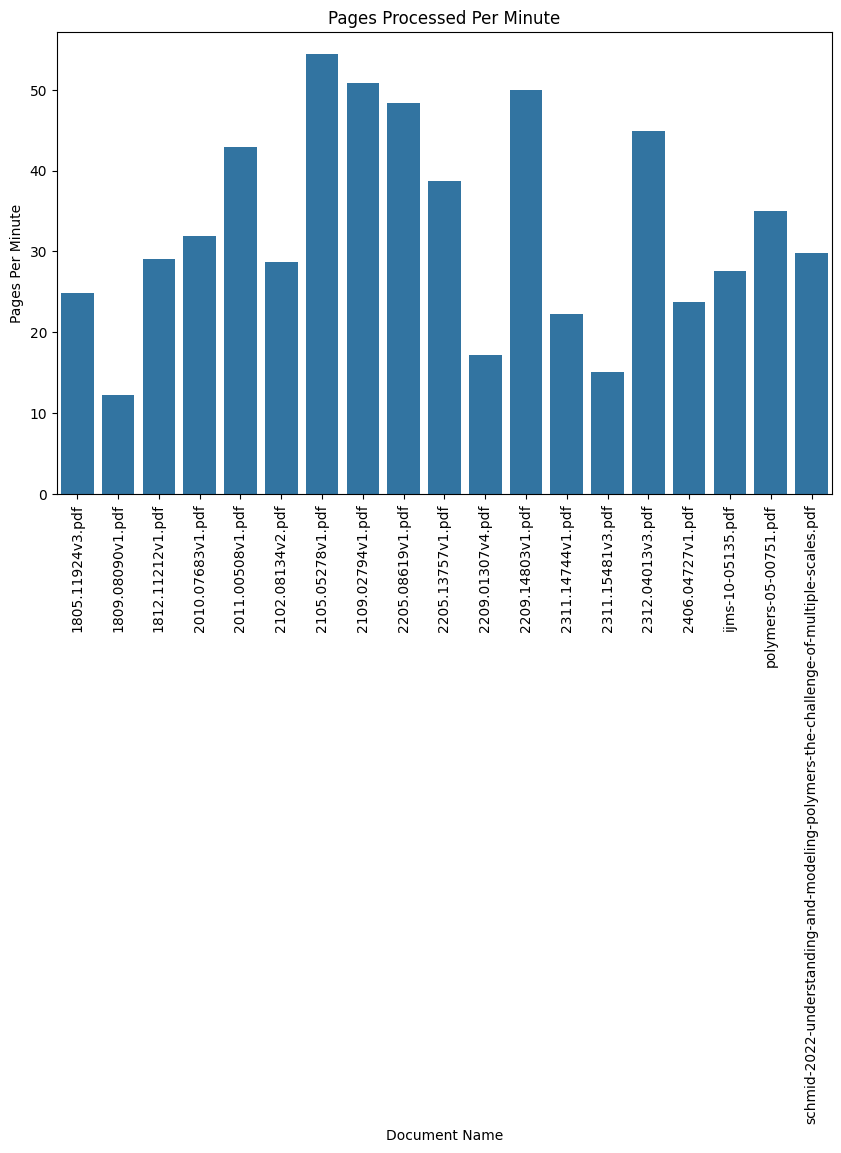

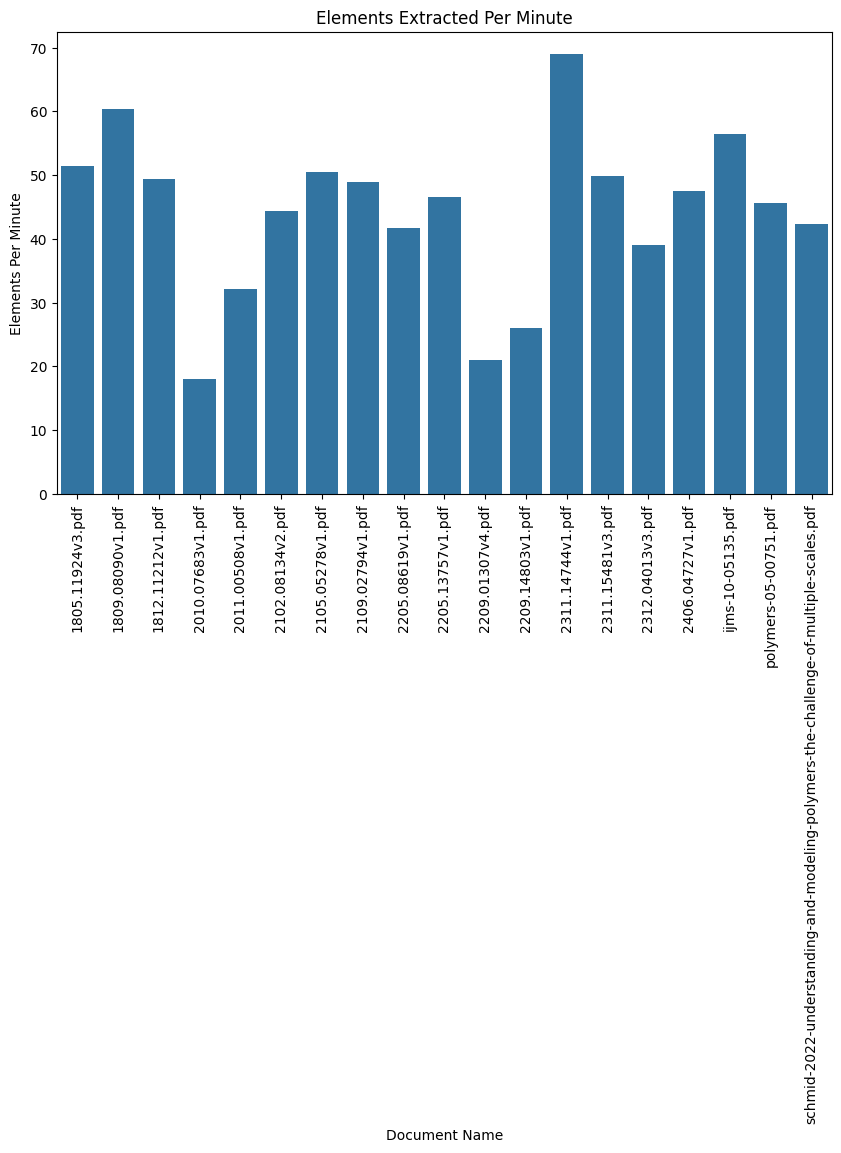

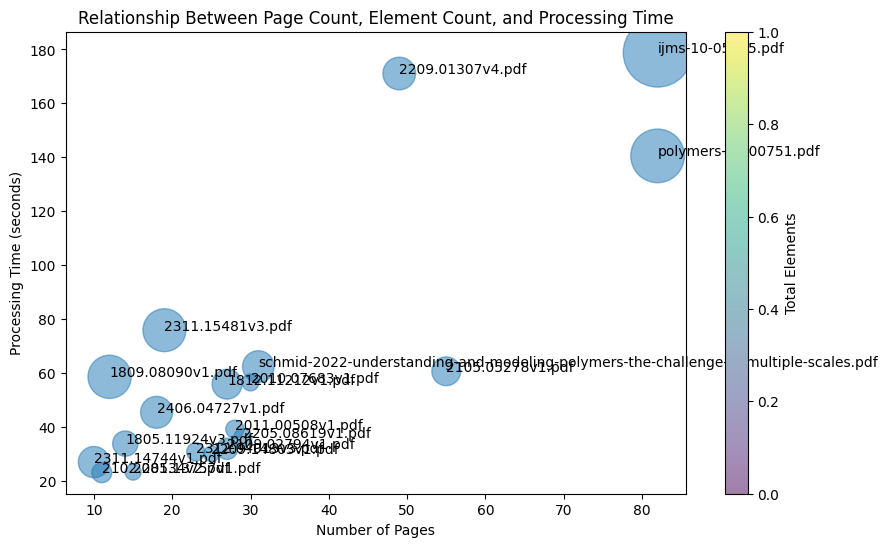

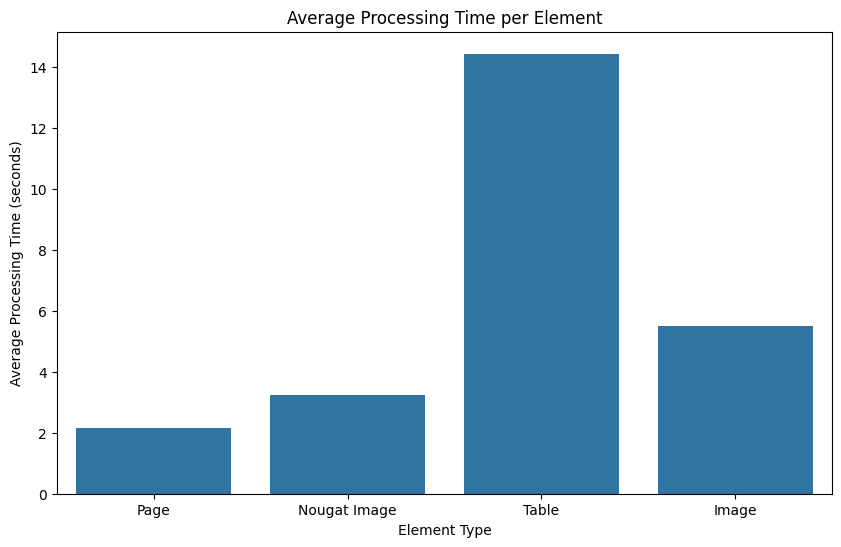

{'total_cost': np.float64(4.533918950491481),
 'avg_cost_per_document': np.float64(0.23862731318376215),
 'avg_cost_per_page': np.float64(0.007723882368810019),
 'avg_cost_per_element': np.float64(0.005327754348403621)}

In [9]:
# Cost Analysis

# Define cost parameters
cost_params = {
    'gpu_cost_per_hour': 0.5,  # Cost of GPU usage in dollars per hour
    'image_processing_cost': 0.01,  # Cost per image in dollars
    'table_processing_cost': 0.02,  # Cost per table in dollars
    'nougat_image_processing_cost': 0.0  # Cost per nougat image in dollars
}

# Calculate GPU cost based on processing time
documents_df['gpu_cost'] = documents_df['processing_time_seconds'] / 3600 * cost_params['gpu_cost_per_hour']

# Calculate image processing costs
documents_df['image_processing_cost'] = documents_df['images'] * cost_params['image_processing_cost']
documents_df['table_processing_cost'] = documents_df['tables'] * cost_params['table_processing_cost']
documents_df['nougat_processing_cost'] = documents_df['nougat_images'] * cost_params['nougat_image_processing_cost']

# Calculate total cost
documents_df['total_cost'] = (documents_df['gpu_cost'] + 
                              documents_df['image_processing_cost'] + 
                              documents_df['table_processing_cost'] + 
                              documents_df['nougat_processing_cost'])

# Calculate cost metrics
documents_df['cost_per_page'] = documents_df['total_cost'] / documents_df['pages']
documents_df['cost_per_element'] = documents_df['total_cost'] / (documents_df['images'] + documents_df['tables'] + documents_df['nougat_images'])

# Display cost summary statistics
cost_summary = documents_df[['gpu_cost', 'image_processing_cost', 'table_processing_cost', 
                           'nougat_processing_cost', 'total_cost', 'cost_per_page', 'cost_per_element']].describe()
cost_summary

# Visualize cost breakdown
plt.figure(figsize=(10, 6))
cost_data = documents_df[['gpu_cost', 'image_processing_cost', 'table_processing_cost', 'nougat_processing_cost']].sum()
plt.pie(cost_data, labels=cost_data.index, autopct='%1.1f%%')
plt.title('Overall Cost Breakdown')
plt.show()

# Bar chart of average cost per page by document
plt.figure(figsize=(12, 8))
sns.barplot(x='document_name', y='cost_per_page', data=documents_df)
plt.title('Cost per Page by Document')
plt.xlabel('Document Name')
plt.ylabel('Cost per Page ($)')
plt.xticks(rotation=90)
plt.show()

# Scatter plot of document size vs total cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pages', y='total_cost', data=documents_df)
plt.title('Document Size vs Total Processing Cost')
plt.xlabel('Number of Pages')
plt.ylabel('Total Cost ($)')
plt.show()

# Scatter plot of elements extracted vs cost per element
plt.figure(figsize=(10, 6))
documents_df['total_elements'] = documents_df['images'] + documents_df['tables'] + documents_df['nougat_images']
sns.scatterplot(x='total_elements', y='cost_per_element', data=documents_df)
plt.title('Elements Extracted vs Cost per Element')
plt.xlabel('Total Elements Extracted')
plt.ylabel('Cost per Element ($)')
plt.show()

# Calculate overall cost metrics
total_cost = documents_df['total_cost'].sum()
avg_cost_per_document = documents_df['total_cost'].mean()
avg_cost_per_page = documents_df['total_cost'].sum() / overall_metrics['total_pages']
avg_cost_per_element = documents_df['total_cost'].sum() / (
    overall_metrics['total_images'] + overall_metrics['total_tables'] + overall_metrics['total_nougat_images'])

cost_efficiency_metrics = {
    'total_cost': total_cost,
    'avg_cost_per_document': avg_cost_per_document,
    'avg_cost_per_page': avg_cost_per_page,
    'avg_cost_per_element': avg_cost_per_element
}


# Calculate elements extracted per second
documents_df['elements_extracted_per_second'] = (documents_df['images'] + documents_df['tables'] + documents_df['nougat_images']) / documents_df['processing_time_seconds']

# Calculate efficiency metrics
documents_df['pages_per_minute'] = documents_df['pages'] / (documents_df['processing_time_seconds'] / 60)
documents_df['elements_per_minute'] = (documents_df['images'] + documents_df['tables'] + documents_df['nougat_images']) / (documents_df['processing_time_seconds'] / 60)

# Plot pages processed per minute
plt.figure(figsize=(10, 6))
sns.barplot(x='document_name', y='pages_per_minute', data=documents_df)
plt.title('Pages Processed Per Minute')
plt.xlabel('Document Name')
plt.ylabel('Pages Per Minute')
plt.xticks(rotation=90)
plt.show()

# Plot elements extracted per minute
plt.figure(figsize=(10, 6))
sns.barplot(x='document_name', y='elements_per_minute', data=documents_df)
plt.title('Elements Extracted Per Minute')
plt.xlabel('Document Name')
plt.ylabel('Elements Per Minute')
plt.xticks(rotation=90)
plt.show()

# Visualize the relationship between processing time, page count, and element count
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(documents_df['pages'], documents_df['processing_time_seconds'], 
                    s=documents_df['images'] + documents_df['tables'] + documents_df['nougat_images'] * 20, 
                    alpha=0.5)
plt.title('Relationship Between Page Count, Element Count, and Processing Time')
plt.xlabel('Number of Pages')
plt.ylabel('Processing Time (seconds)')
plt.colorbar(scatter, label='Total Elements')
for i, row in documents_df.iterrows():
    plt.annotate(row['document_name'], (row['pages'], row['processing_time_seconds']))
plt.show()

# Identify potential bottlenecks (operations that take the most time)
processing_time_per_element = pd.DataFrame({
    'Element Type': ['Page', 'Nougat Image', 'Table', 'Image'],
    'Average Processing Time (s)': [
        documents_df['processing_time_per_page'].mean(),
        documents_df['processing_time_per_nougat_image'].mean(),
        documents_df['processing_time_per_table'].mean(),
        documents_df['processing_time_per_image'].mean()
    ]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Element Type', y='Average Processing Time (s)', data=processing_time_per_element)
plt.title('Average Processing Time per Element')
plt.xlabel('Element Type')
plt.ylabel('Average Processing Time (seconds)')
plt.show()

# Display cost efficiency metrics
cost_efficiency_metrics

# Add new cell for Cost Analysis

Cost Analysis:
Total GPU Cost (USD): $0.3147
Total Postprocessing Cost (USD): $1.6950
Total Cost (USD): $2.0097
Average Cost per Document (USD): $0.1058
Average Cost per Page (USD): $0.0034
Estimated Nougat Processing Percentage (%): $139.7223
Estimated Nougat GPU Cost (USD): $0.4397


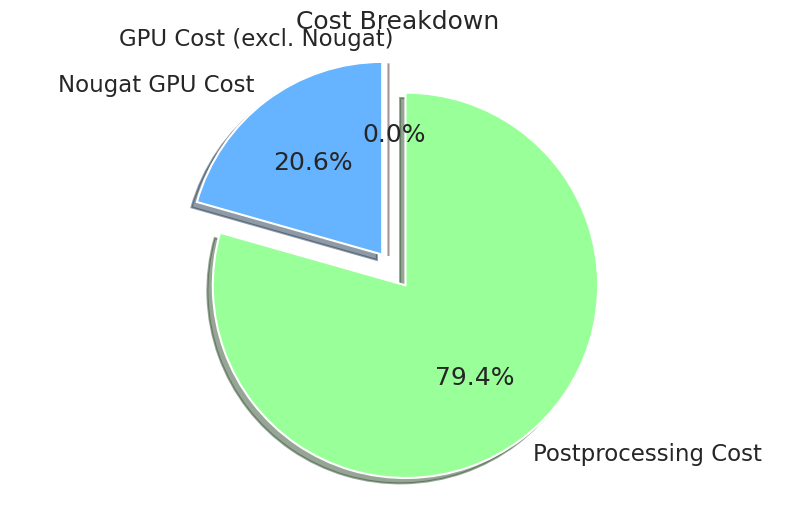

/tmp/ipykernel_9460/1110177756.py:85: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

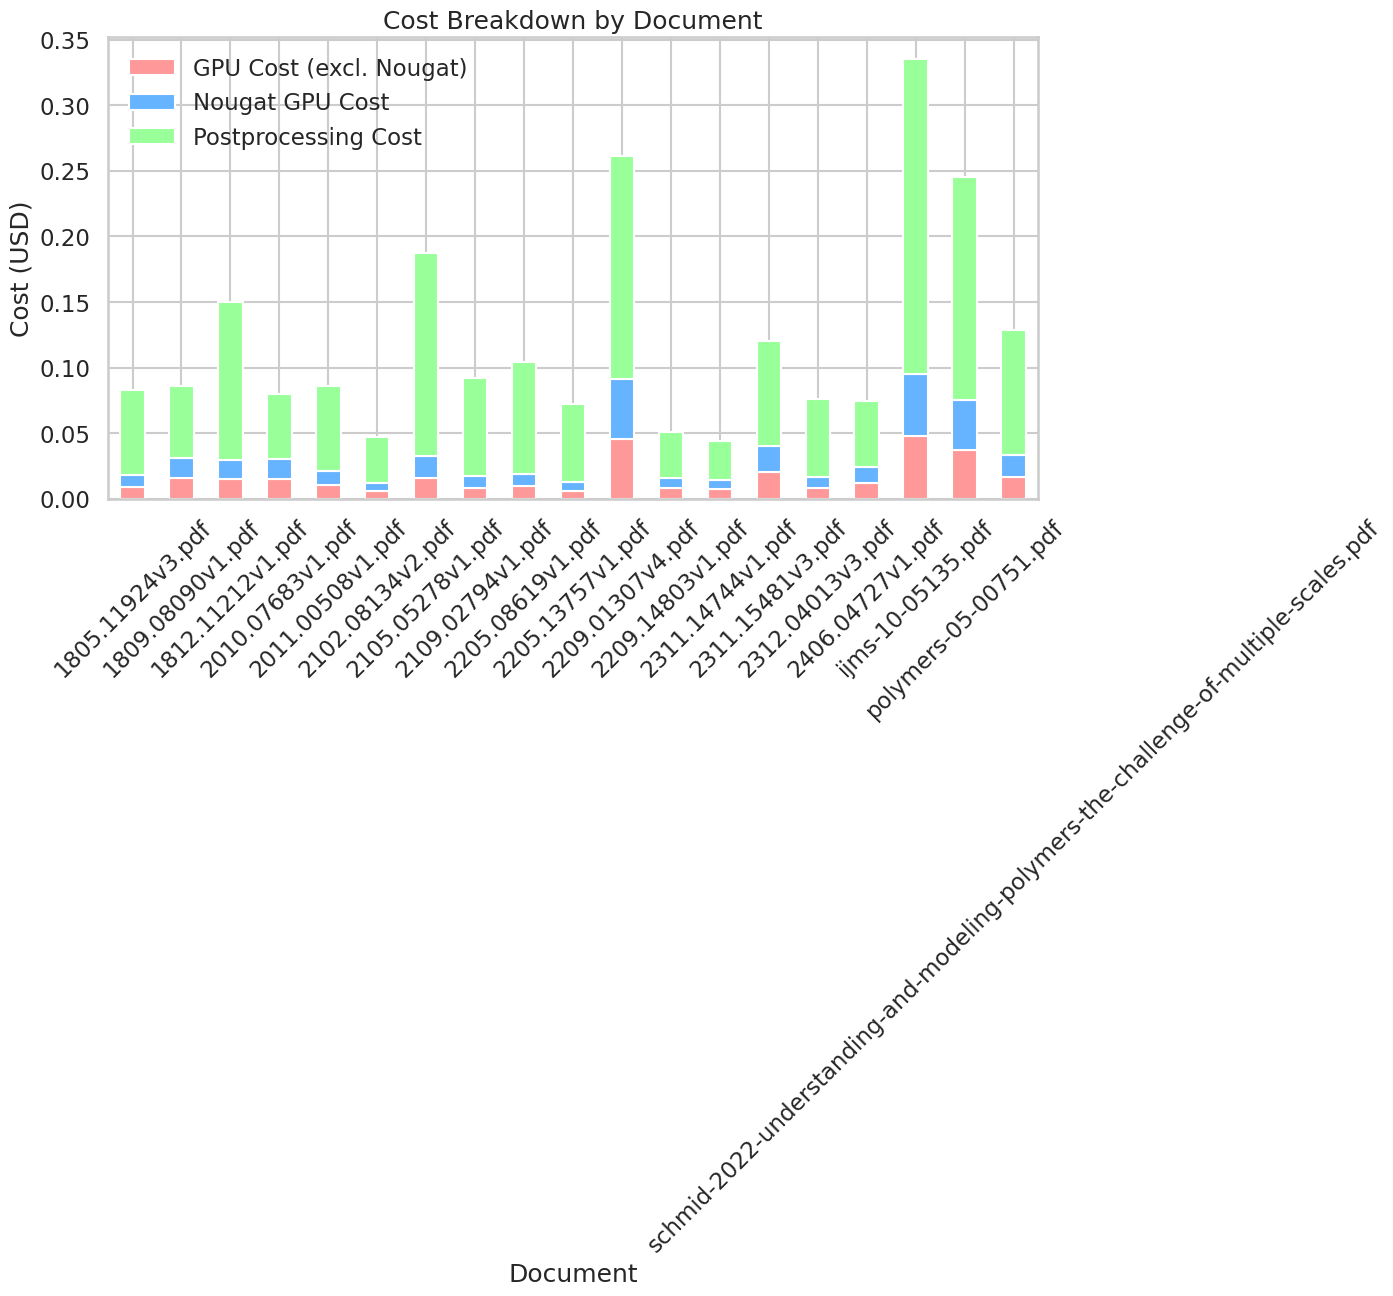

/tmp/ipykernel_9460/1110177756.py:95: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


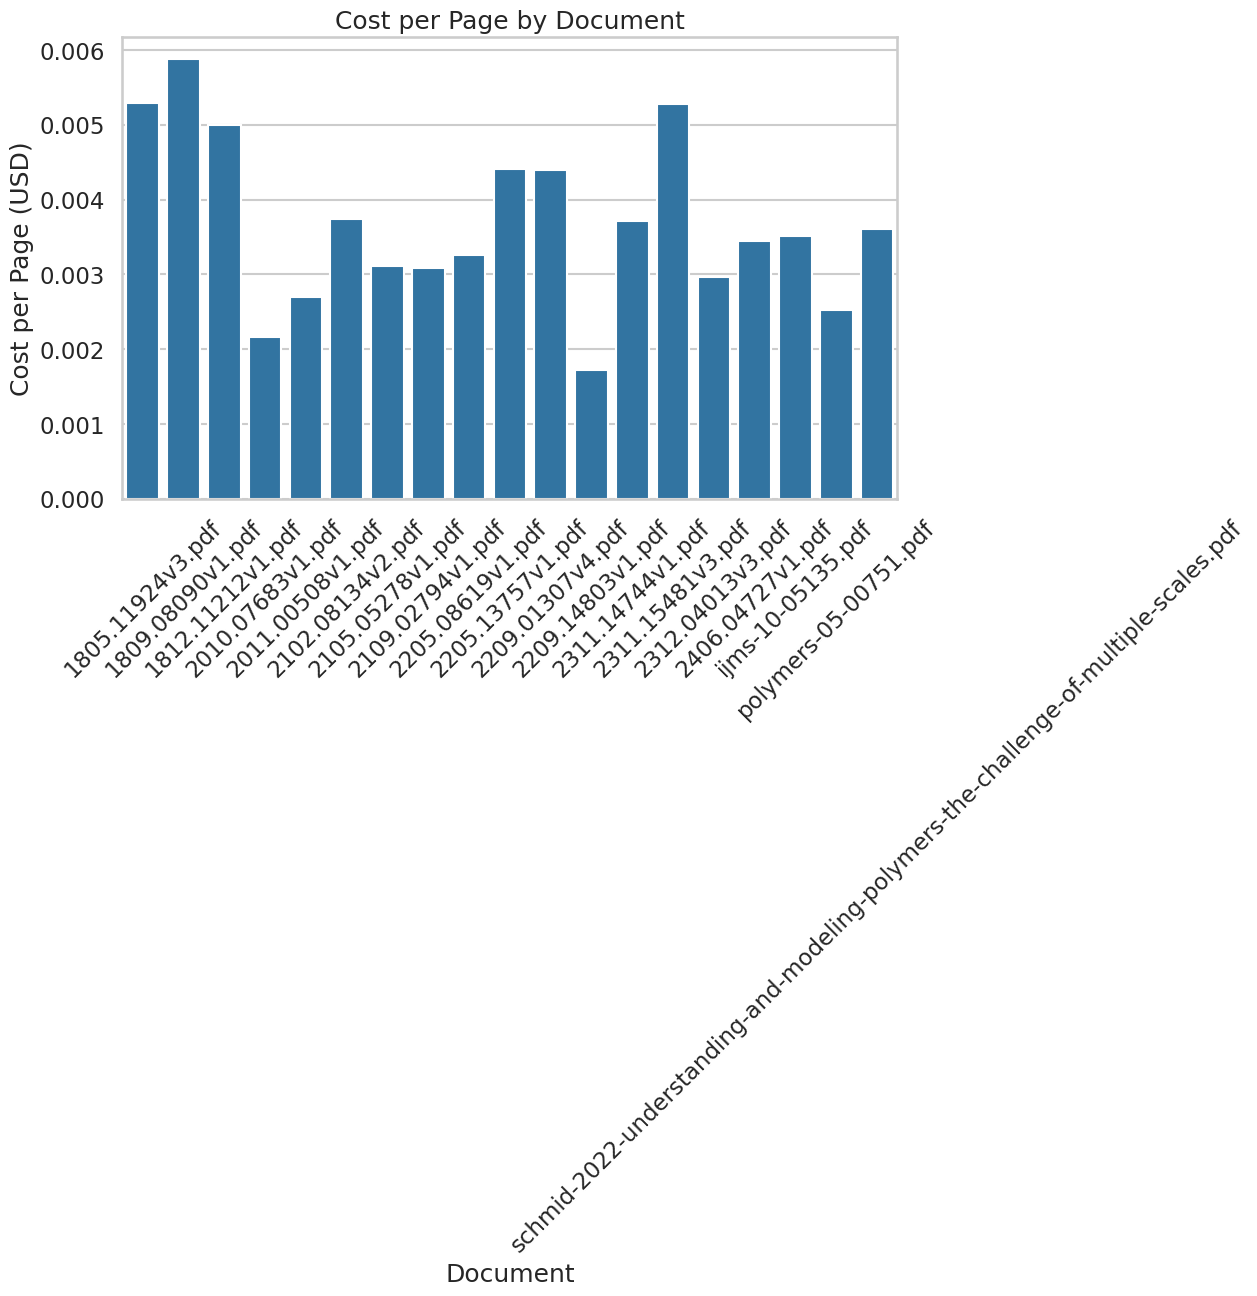

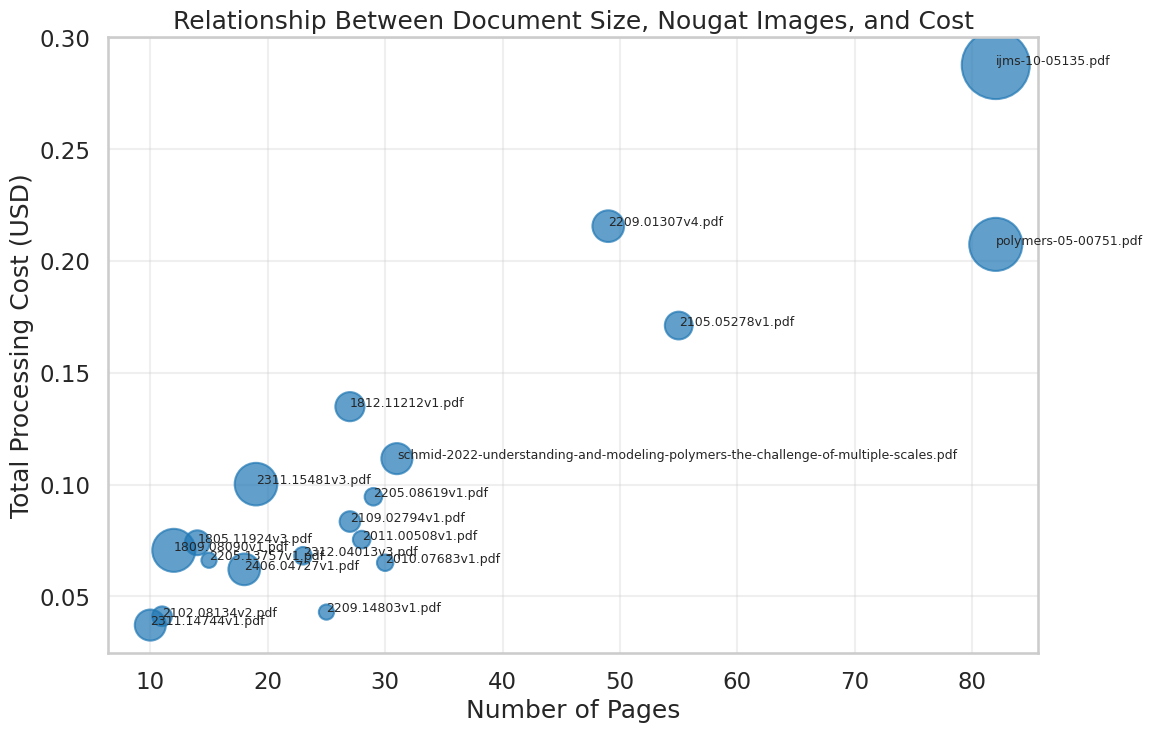

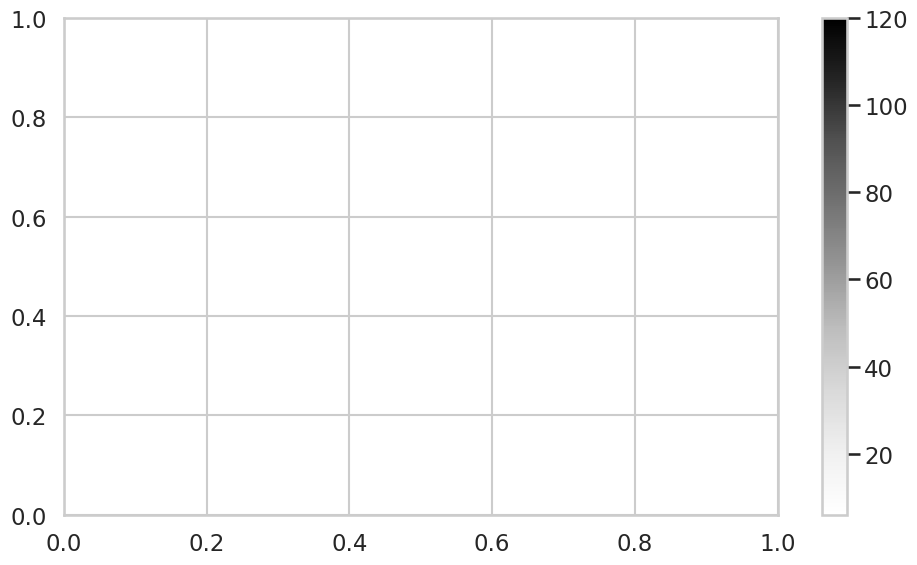

/tmp/ipykernel_9460/1110177756.py:129: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


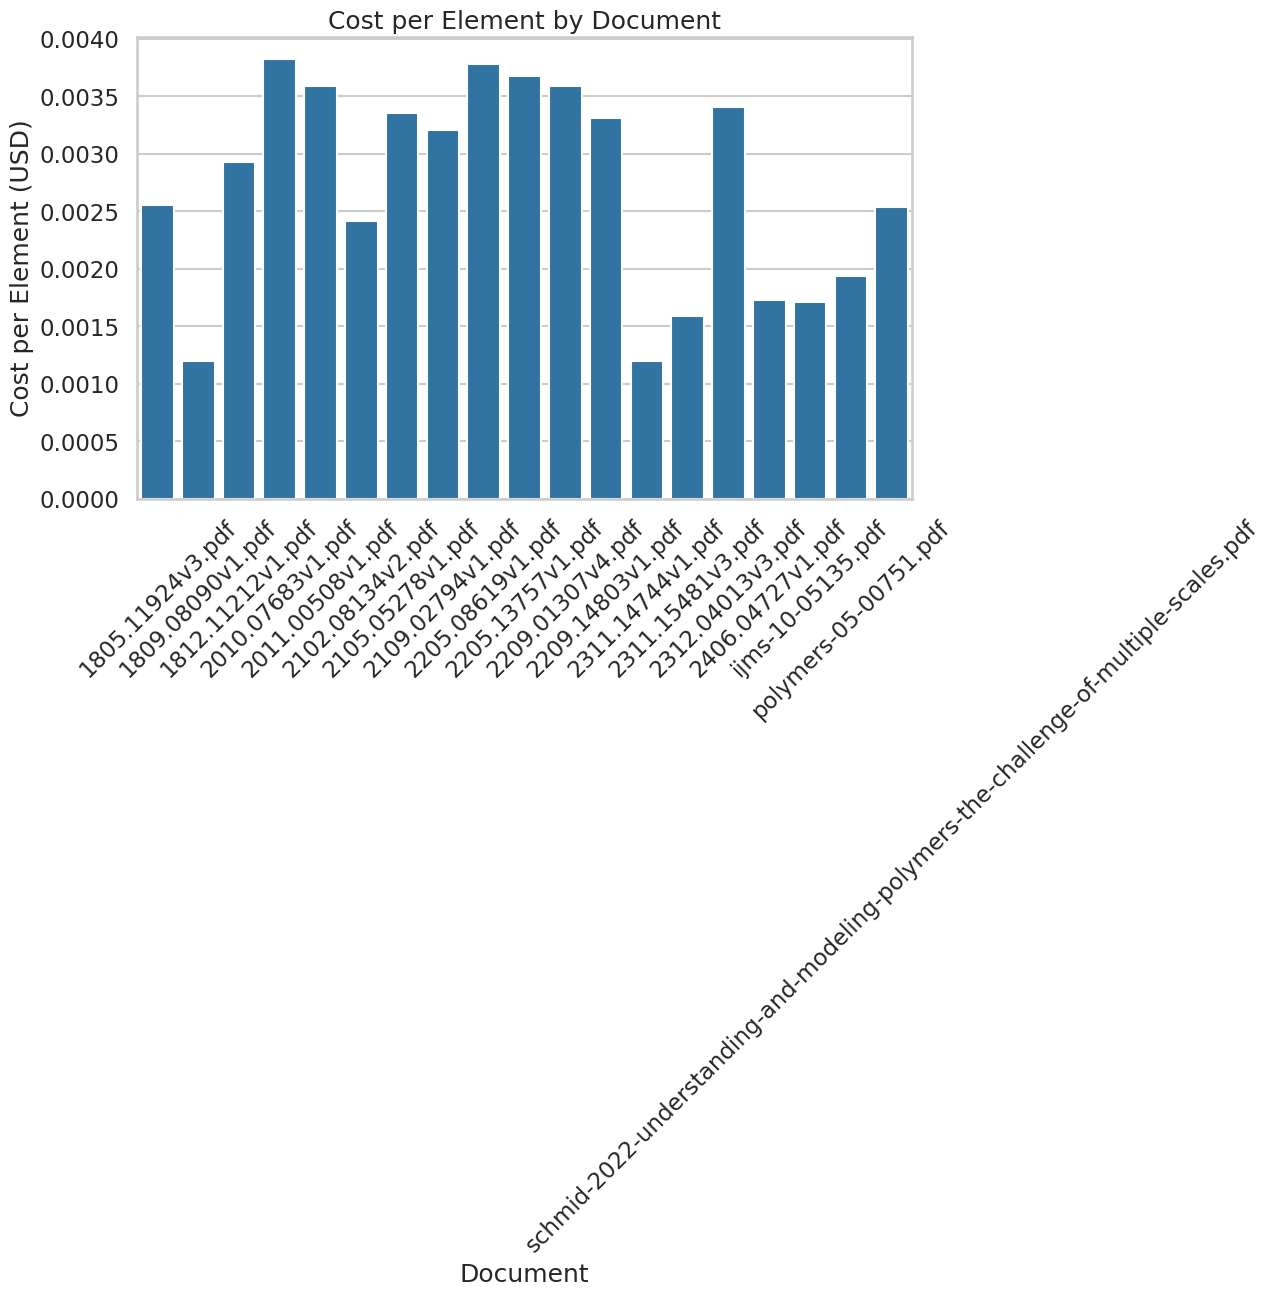

/tmp/ipykernel_9460/1110177756.py:138: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


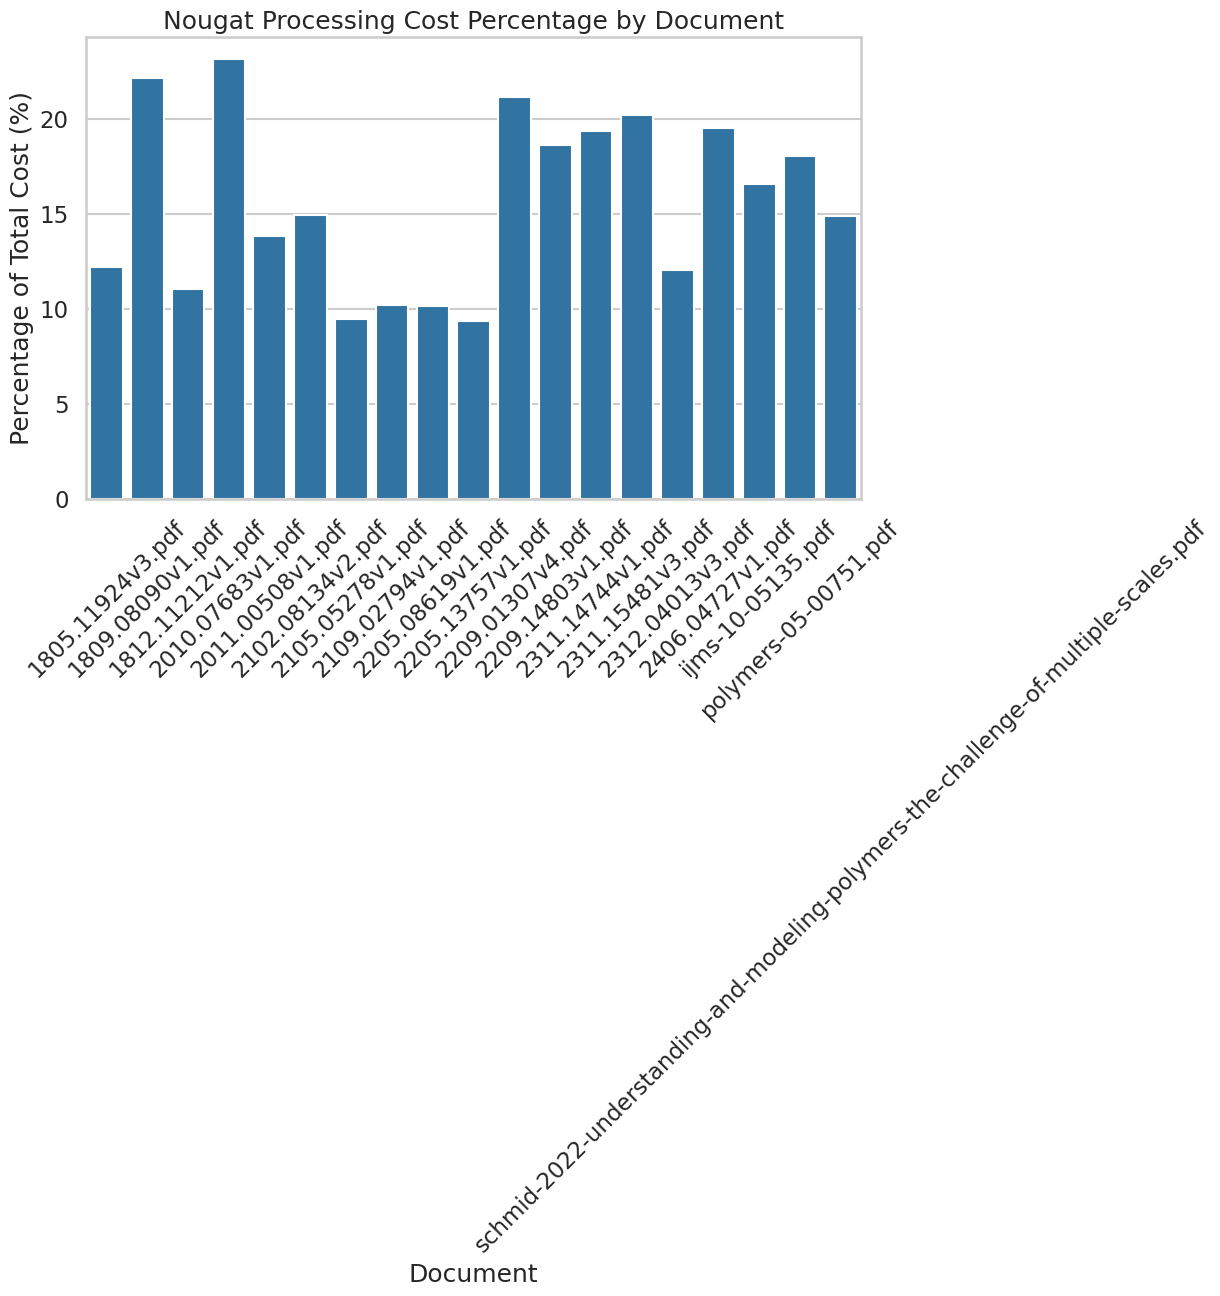


Cost Optimization Recommendations:
1. The average cost per page is $0.0034
2. Nougat image processing accounts for 139.7% of the total processing time
3. The most cost-effective document was: 2209.14803v1.pdf at $0.0017 per page
4. The least cost-effective document was: 1809.08090v1.pdf at $0.0059 per page

Projected Costs for Larger Datasets:
   Number of Documents  Projected Processing Time (hours)  \
0                   10                           0.172546   
1                   50                           0.862731   
2                  100                           1.725463   
3                  500                           8.627313   
4                 1000                          17.254626   

   Projected Cost (USD)  
0              1.057750  
1              5.288748  
2             10.577497  
3             52.887484  
4            105.774968  


In [ ]:
# Add this cell after the "Evaluate Pipeline Efficiency" section
import numpy as np  
# Cost Analysis
# Define costs
gpu_cost_per_hour = 0.96  # USD/hour
postprocessing_cost_per_item = 0.01  # USD per image or table

# Calculate processing time in hours
total_processing_time_hours = total_time_seconds / 3600

# Calculate GPU cost
total_gpu_cost = total_processing_time_hours * gpu_cost_per_hour

# Calculate postprocessing cost for images and tables
total_postprocessing_cost = (total_images + total_tables) * postprocessing_cost_per_item

# Calculate total cost
total_cost = total_gpu_cost + total_postprocessing_cost

# Calculate average costs
avg_cost_per_document = total_cost / total_documents
avg_cost_per_page = total_cost / total_pages

# Estimated nougat image processing time
# Assume nougat image processing is the most intensive GPU operation
# Estimate based on nougat images processing time versus total time
avg_time_per_nougat_image = documents_df['processing_time_per_nougat_image'].mean()
estimated_nougat_processing_time = total_nougat_images * avg_time_per_nougat_image
nougat_processing_percentage = (estimated_nougat_processing_time / total_time_seconds) * 100
estimated_nougat_gpu_cost = (estimated_nougat_processing_time / 3600) * gpu_cost_per_hour

# Calculate costs per document
documents_df['processing_time_hours'] = documents_df['processing_time_seconds'] / 3600
documents_df['gpu_cost'] = documents_df['processing_time_hours'] * gpu_cost_per_hour
documents_df['postprocessing_cost'] = (documents_df['images'] + documents_df['tables']) * postprocessing_cost_per_item
documents_df['total_cost'] = documents_df['gpu_cost'] + documents_df['postprocessing_cost']
documents_df['cost_per_page'] = documents_df['total_cost'] / documents_df['pages']

# Estimated nougat processing cost per document
documents_df['estimated_nougat_processing_time'] = documents_df['nougat_images'] * documents_df['processing_time_per_nougat_image']
documents_df['estimated_nougat_processing_percentage'] = (documents_df['estimated_nougat_processing_time'] / documents_df['processing_time_seconds']) * 100
documents_df['estimated_nougat_gpu_cost'] = (documents_df['estimated_nougat_processing_time'] / 3600) * gpu_cost_per_hour

# Display cost metrics
cost_metrics = {
    'Total GPU Cost (USD)': total_gpu_cost,
    'Total Postprocessing Cost (USD)': total_postprocessing_cost,
    'Total Cost (USD)': total_cost,
    'Average Cost per Document (USD)': avg_cost_per_document,
    'Average Cost per Page (USD)': avg_cost_per_page,
    'Estimated Nougat Processing Percentage (%)': nougat_processing_percentage,
    'Estimated Nougat GPU Cost (USD)': estimated_nougat_gpu_cost
}

print("Cost Analysis:")
for metric, value in cost_metrics.items():
    print(f"{metric}: ${value:.4f}")

# Plot cost breakdown
plt.figure(figsize=(10, 6))
labels = ['GPU Cost (excl. Nougat)', 'Nougat GPU Cost', 'Postprocessing Cost']
sizes = [total_gpu_cost - estimated_nougat_gpu_cost, estimated_nougat_gpu_cost, total_postprocessing_cost]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0.1, 0.1)

sizes = np.maximum(0, sizes)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Cost Breakdown')
plt.show()

# Plot cost by document
plt.figure(figsize=(12, 8))
documents_df[['gpu_cost', 'estimated_nougat_gpu_cost', 'postprocessing_cost']].plot(
    kind='bar', stacked=True,
    color=['#ff9999', '#66b3ff', '#99ff99'],
    figsize=(12, 6)
)
plt.title('Cost Breakdown by Document')
plt.xlabel('Document')
plt.ylabel('Cost (USD)')
plt.xticks(range(len(documents_df)), documents_df['document_name'], rotation=45)
plt.legend(['GPU Cost (excl. Nougat)', 'Nougat GPU Cost', 'Postprocessing Cost'])
plt.tight_layout()
plt.show()

# Plot cost per page by document
plt.figure(figsize=(10, 6))
sns.barplot(x='document_name', y='cost_per_page', data=documents_df)
plt.title('Cost per Page by Document')
plt.xlabel('Document')
plt.ylabel('Cost per Page (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot relationship between document characteristics and cost
plt.figure(figsize=(12, 8))
plt.scatter(documents_df['pages'], documents_df['total_cost'], s=documents_df['nougat_images']*20, alpha=0.7, label='Documents')
plt.xlabel('Number of Pages')
plt.ylabel('Total Processing Cost (USD)')
plt.title('Relationship Between Document Size, Nougat Images, and Cost')
plt.grid(True, alpha=0.3)
for i, row in documents_df.iterrows():
    plt.annotate(row['document_name'], (row['pages'], row['total_cost']), fontsize=9)

fig, ax = plt.subplots()
# Create a dummy invisible plot with the same color scale
sm = plt.cm.ScalarMappable(norm=plt.Normalize(documents_df['nougat_images'].min(), 
                                             documents_df['nougat_images'].max()))
sm.set_array([])  # You need to set an array even if empty
cbar = plt.colorbar(sm, ax=ax)

plt.tight_layout()
plt.show()

# Calculate cost efficiency metrics
documents_df['cost_per_element'] = documents_df['total_cost'] / (documents_df['images'] + documents_df['tables'] + documents_df['nougat_images'])
documents_df['nougat_cost_percentage'] = (documents_df['estimated_nougat_gpu_cost'] / documents_df['total_cost']) * 100

# Display cost efficiency metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='document_name', y='cost_per_element', data=documents_df)
plt.title('Cost per Element by Document')
plt.xlabel('Document')
plt.ylabel('Cost per Element (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='document_name', y='nougat_cost_percentage', data=documents_df)
plt.title('Nougat Processing Cost Percentage by Document')
plt.xlabel('Document')
plt.ylabel('Percentage of Total Cost (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find optimal batch size and processing strategies
print("\nCost Optimization Recommendations:")
print("1. The average cost per page is ${:.4f}".format(avg_cost_per_page))
print("2. Nougat image processing accounts for {:.1f}% of the total processing time".format(nougat_processing_percentage))
print("3. The most cost-effective document was: {} at ${:.4f} per page".format(
    documents_df.loc[documents_df['cost_per_page'].idxmin(), 'document_name'],
    documents_df['cost_per_page'].min()
))
print("4. The least cost-effective document was: {} at ${:.4f} per page".format(
    documents_df.loc[documents_df['cost_per_page'].idxmax(), 'document_name'],
    documents_df['cost_per_page'].max()
))

# Calculate the projected costs for processing larger datasets
projected_costs = pd.DataFrame({
    'Number of Documents': [10, 50, 100, 500, 1000],
    'Projected Processing Time (hours)': [total_processing_time_hours * n / total_documents for n in [10, 50, 100, 500, 1000]],
    'Projected Cost (USD)': [total_cost * n / total_documents for n in [10, 50, 100, 500, 1000]]
})

print("\nProjected Costs for Larger Datasets:")
print(projected_costs)

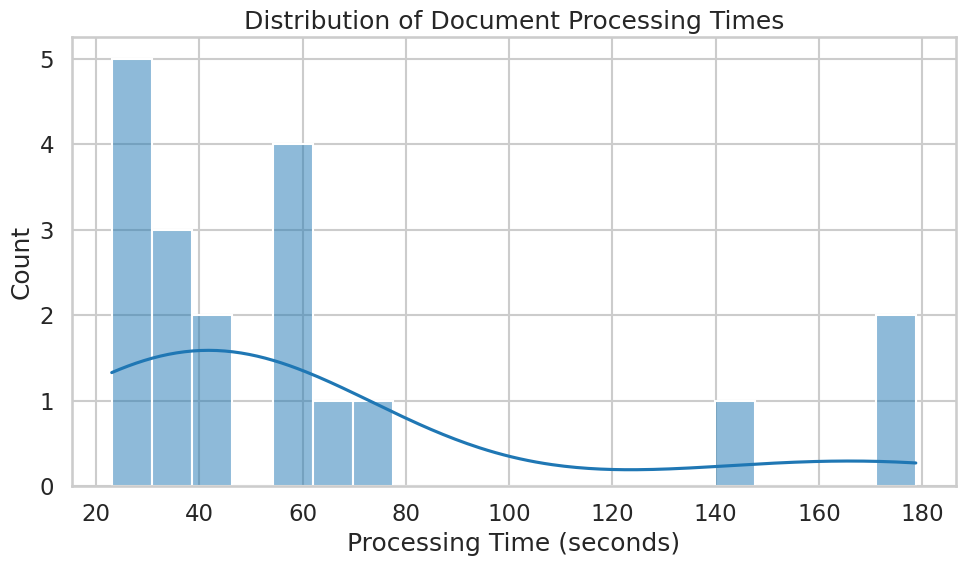

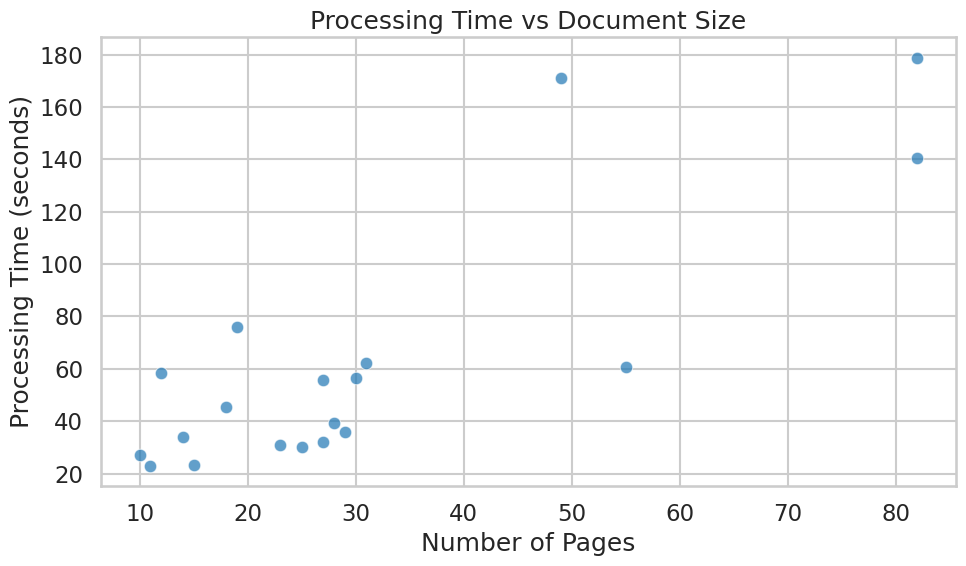

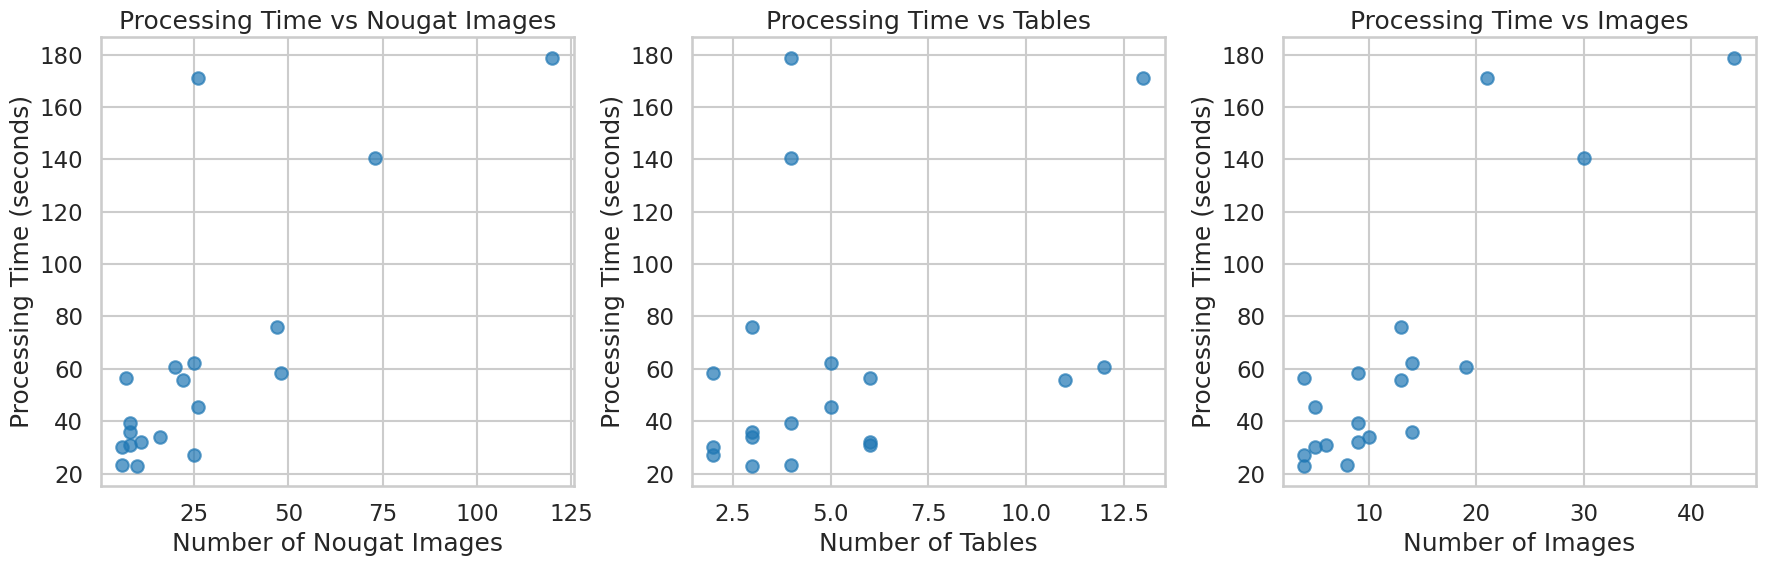

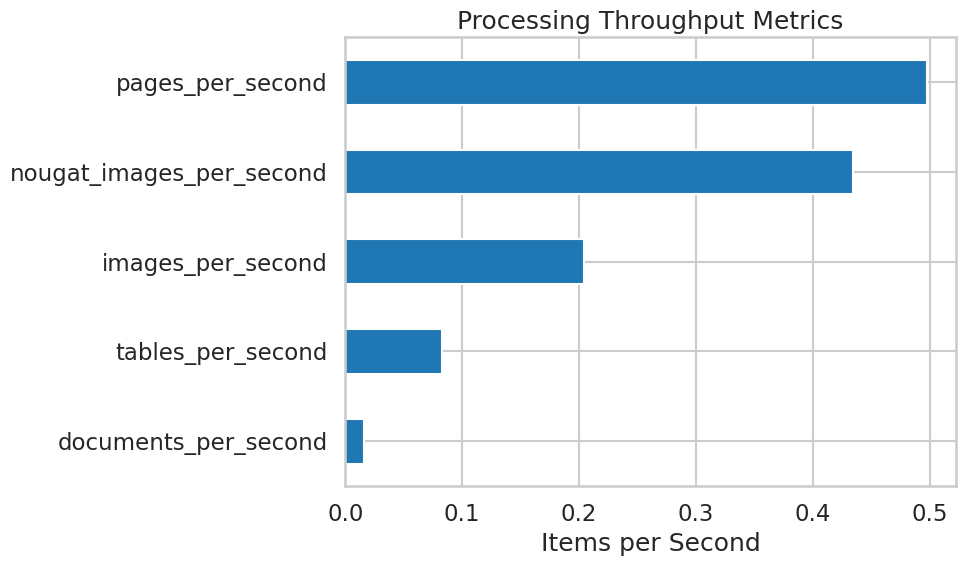

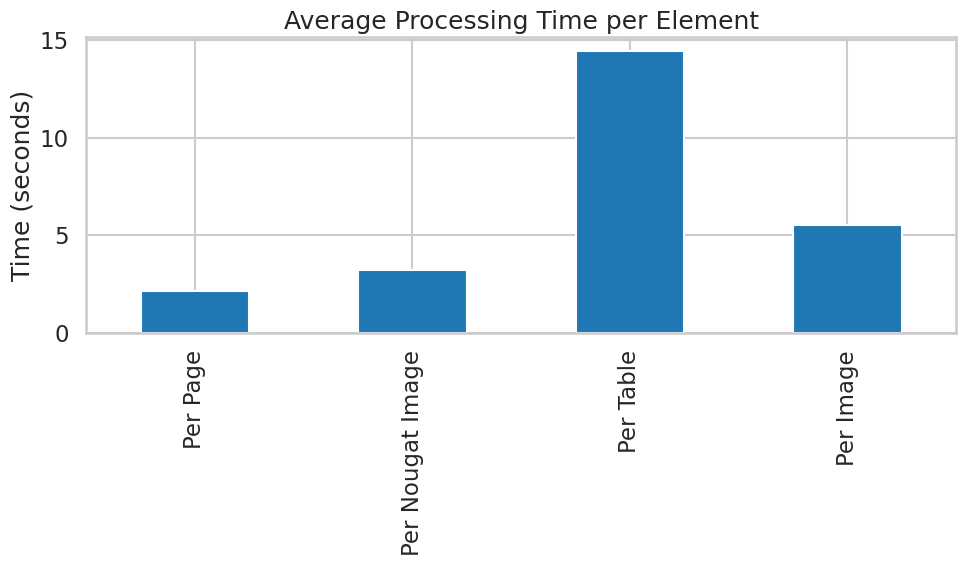

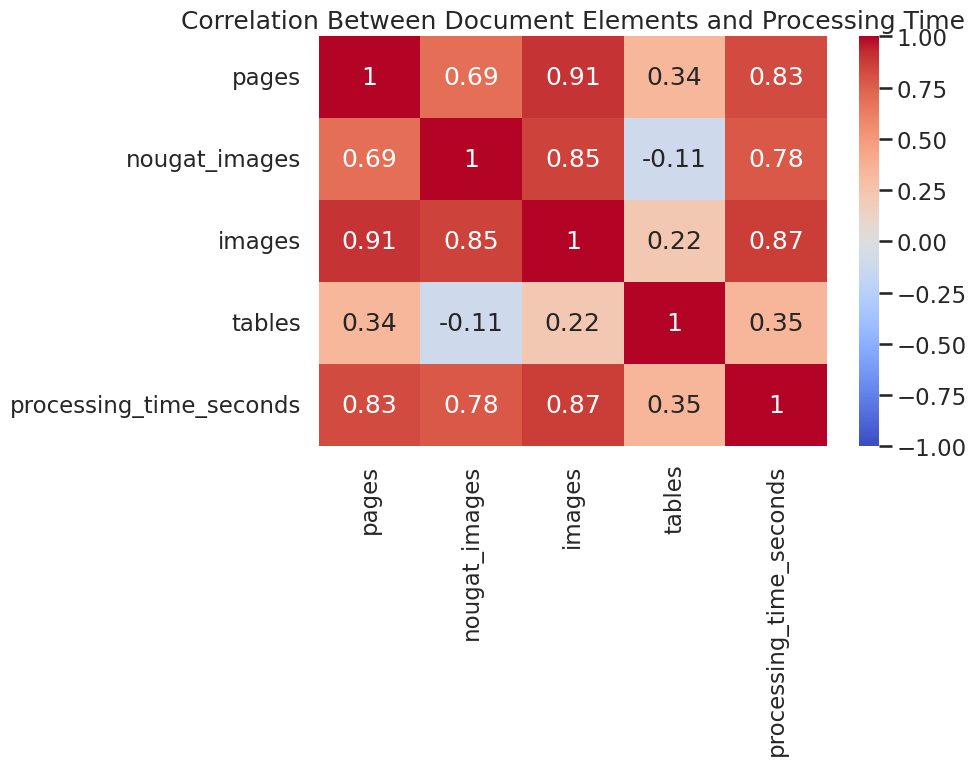

Summary Statistics:
Total Documents Processed: 19
Total Pages Processed: 587
Average Processing Time per Document: 62.12 seconds
Average Processing Time per Page: 2.16 seconds

Throughput Metrics:
Documents Per Second: 0.0161
Pages Per Second: 0.4974
Nougat Images Per Second: 0.4338
Images Per Second: 0.2042
Tables Per Second: 0.0830

Potential Performance Driver: images
Correlation with processing time: 0.8704


In [13]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Load the Combined Report Data
with open('/home/azureuser/academic-document-analyzer/nb/Profile_pipeline/combined_report.json', 'r') as file:
    combined_report = json.load(file)

# Convert the combined report to a pandas DataFrame
documents_df = pd.DataFrame(combined_report['documents'])

# Extract overall metrics
overall_metrics = {key: combined_report[key] for key in combined_report if key != 'documents'}

# Calculate processing statistics
# Processing time per document
documents_df['processing_time_per_page'] = documents_df['processing_time_seconds'] / documents_df['pages']
documents_df['processing_time_per_nougat_image'] = documents_df['processing_time_seconds'] / documents_df['nougat_images']
documents_df['processing_time_per_table'] = documents_df.apply(
    lambda x: x['processing_time_seconds'] / x['tables'] if x['tables'] > 0 else 0, axis=1)
documents_df['processing_time_per_image'] = documents_df.apply(
    lambda x: x['processing_time_seconds'] / x['images'] if x['images'] > 0 else 0, axis=1)

# Calculate throughput metrics
throughput_metrics = {
    'documents_per_second': len(documents_df) / documents_df['processing_time_seconds'].sum(),
    'pages_per_second': documents_df['pages'].sum() / documents_df['processing_time_seconds'].sum(),
    'nougat_images_per_second': documents_df['nougat_images'].sum() / documents_df['processing_time_seconds'].sum(),
    'images_per_second': documents_df['images'].sum() / documents_df['processing_time_seconds'].sum(),
    'tables_per_second': documents_df['tables'].sum() / documents_df['processing_time_seconds'].sum()
}

# Set the style for our plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")

# 1. Processing Time Distribution
plt.figure(figsize=(10, 6))
sns.histplot(documents_df['processing_time_seconds'], bins=20, kde=True)
plt.title('Distribution of Document Processing Times')
plt.xlabel('Processing Time (seconds)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.savefig('processing_time_distribution.png')
plt.show()

# 2. Processing Time vs Document Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pages', y='processing_time_seconds', data=documents_df, alpha=0.7)
plt.title('Processing Time vs Document Size')
plt.xlabel('Number of Pages')
plt.ylabel('Processing Time (seconds)')
plt.grid(True)
plt.tight_layout()
plt.savefig('processing_time_vs_size.png')
plt.show()

# 3. Processing Time vs Document Elements
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Processing time vs nougat images
axs[0].scatter(documents_df['nougat_images'], documents_df['processing_time_seconds'], alpha=0.7)
axs[0].set_title('Processing Time vs Nougat Images')
axs[0].set_xlabel('Number of Nougat Images')
axs[0].set_ylabel('Processing Time (seconds)')
axs[0].grid(True)

# Processing time vs tables
axs[1].scatter(documents_df['tables'], documents_df['processing_time_seconds'], alpha=0.7)
axs[1].set_title('Processing Time vs Tables')
axs[1].set_xlabel('Number of Tables')
axs[1].set_ylabel('Processing Time (seconds)')
axs[1].grid(True)

# Processing time vs images
axs[2].scatter(documents_df['images'], documents_df['processing_time_seconds'], alpha=0.7)
axs[2].set_title('Processing Time vs Images')
axs[2].set_xlabel('Number of Images')
axs[2].set_ylabel('Processing Time (seconds)')
axs[2].grid(True)

plt.tight_layout()
plt.savefig('processing_time_vs_elements.png')
plt.show()

# 4. Throughput Metrics Visualization
plt.figure(figsize=(10, 6))
pd.Series(throughput_metrics).sort_values().plot(kind='barh')
plt.title('Processing Throughput Metrics')
plt.xlabel('Items per Second')
plt.grid(True)
plt.tight_layout()
plt.savefig('throughput_metrics.png')
plt.show()

# 5. Processing Time per Element
mean_times = {
    'Per Page': documents_df['processing_time_per_page'].mean(),
    'Per Nougat Image': documents_df['processing_time_per_nougat_image'].mean(),
    'Per Table': documents_df['processing_time_per_table'].replace([np.inf, -np.inf], np.nan).dropna().mean(),
    'Per Image': documents_df['processing_time_per_image'].replace([np.inf, -np.inf], np.nan).dropna().mean()
}

plt.figure(figsize=(10, 6))
pd.Series(mean_times).plot(kind='bar')
plt.title('Average Processing Time per Element')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.tight_layout()
plt.savefig('processing_time_per_element.png')
plt.show()

# 6. Correlation Analysis
# Create correlation matrix between document elements and processing time
corr_cols = ['pages', 'nougat_images', 'images', 'tables', 'processing_time_seconds']
corr_matrix = documents_df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Document Elements and Processing Time')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

# Print summary statistics
print("Summary Statistics:")
print(f"Total Documents Processed: {len(documents_df)}")
print(f"Total Pages Processed: {documents_df['pages'].sum()}")
print(f"Average Processing Time per Document: {documents_df['processing_time_seconds'].mean():.2f} seconds")
print(f"Average Processing Time per Page: {documents_df['processing_time_per_page'].mean():.2f} seconds")
print("\nThroughput Metrics:")
for metric, value in throughput_metrics.items():
    print(f"{metric.replace('_', ' ').title()}: {value:.4f}")

# Identify what element correlates most with processing time
processing_time_corr = corr_matrix['processing_time_seconds'].drop('processing_time_seconds')
bottleneck_element = processing_time_corr.idxmax()
bottleneck_corr = processing_time_corr.max()

print(f"\nPotential Performance Driver: {bottleneck_element}")
print(f"Correlation with processing time: {bottleneck_corr:.4f}")